WCSS for Noisy Circles using GMM: 198.04


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


WCSS for Noisy Circles using Spectral: 312.22
WCSS for Noisy Circles using BIRCH: 211.10
WCSS for Blobs using GMM: 955.65
WCSS for Blobs using Spectral: 955.65
WCSS for Blobs using BIRCH: 955.65
WCSS for Varied Variances using GMM: 2906.84
WCSS for Varied Variances using Spectral: 2782.26
WCSS for Varied Variances using BIRCH: 2752.71


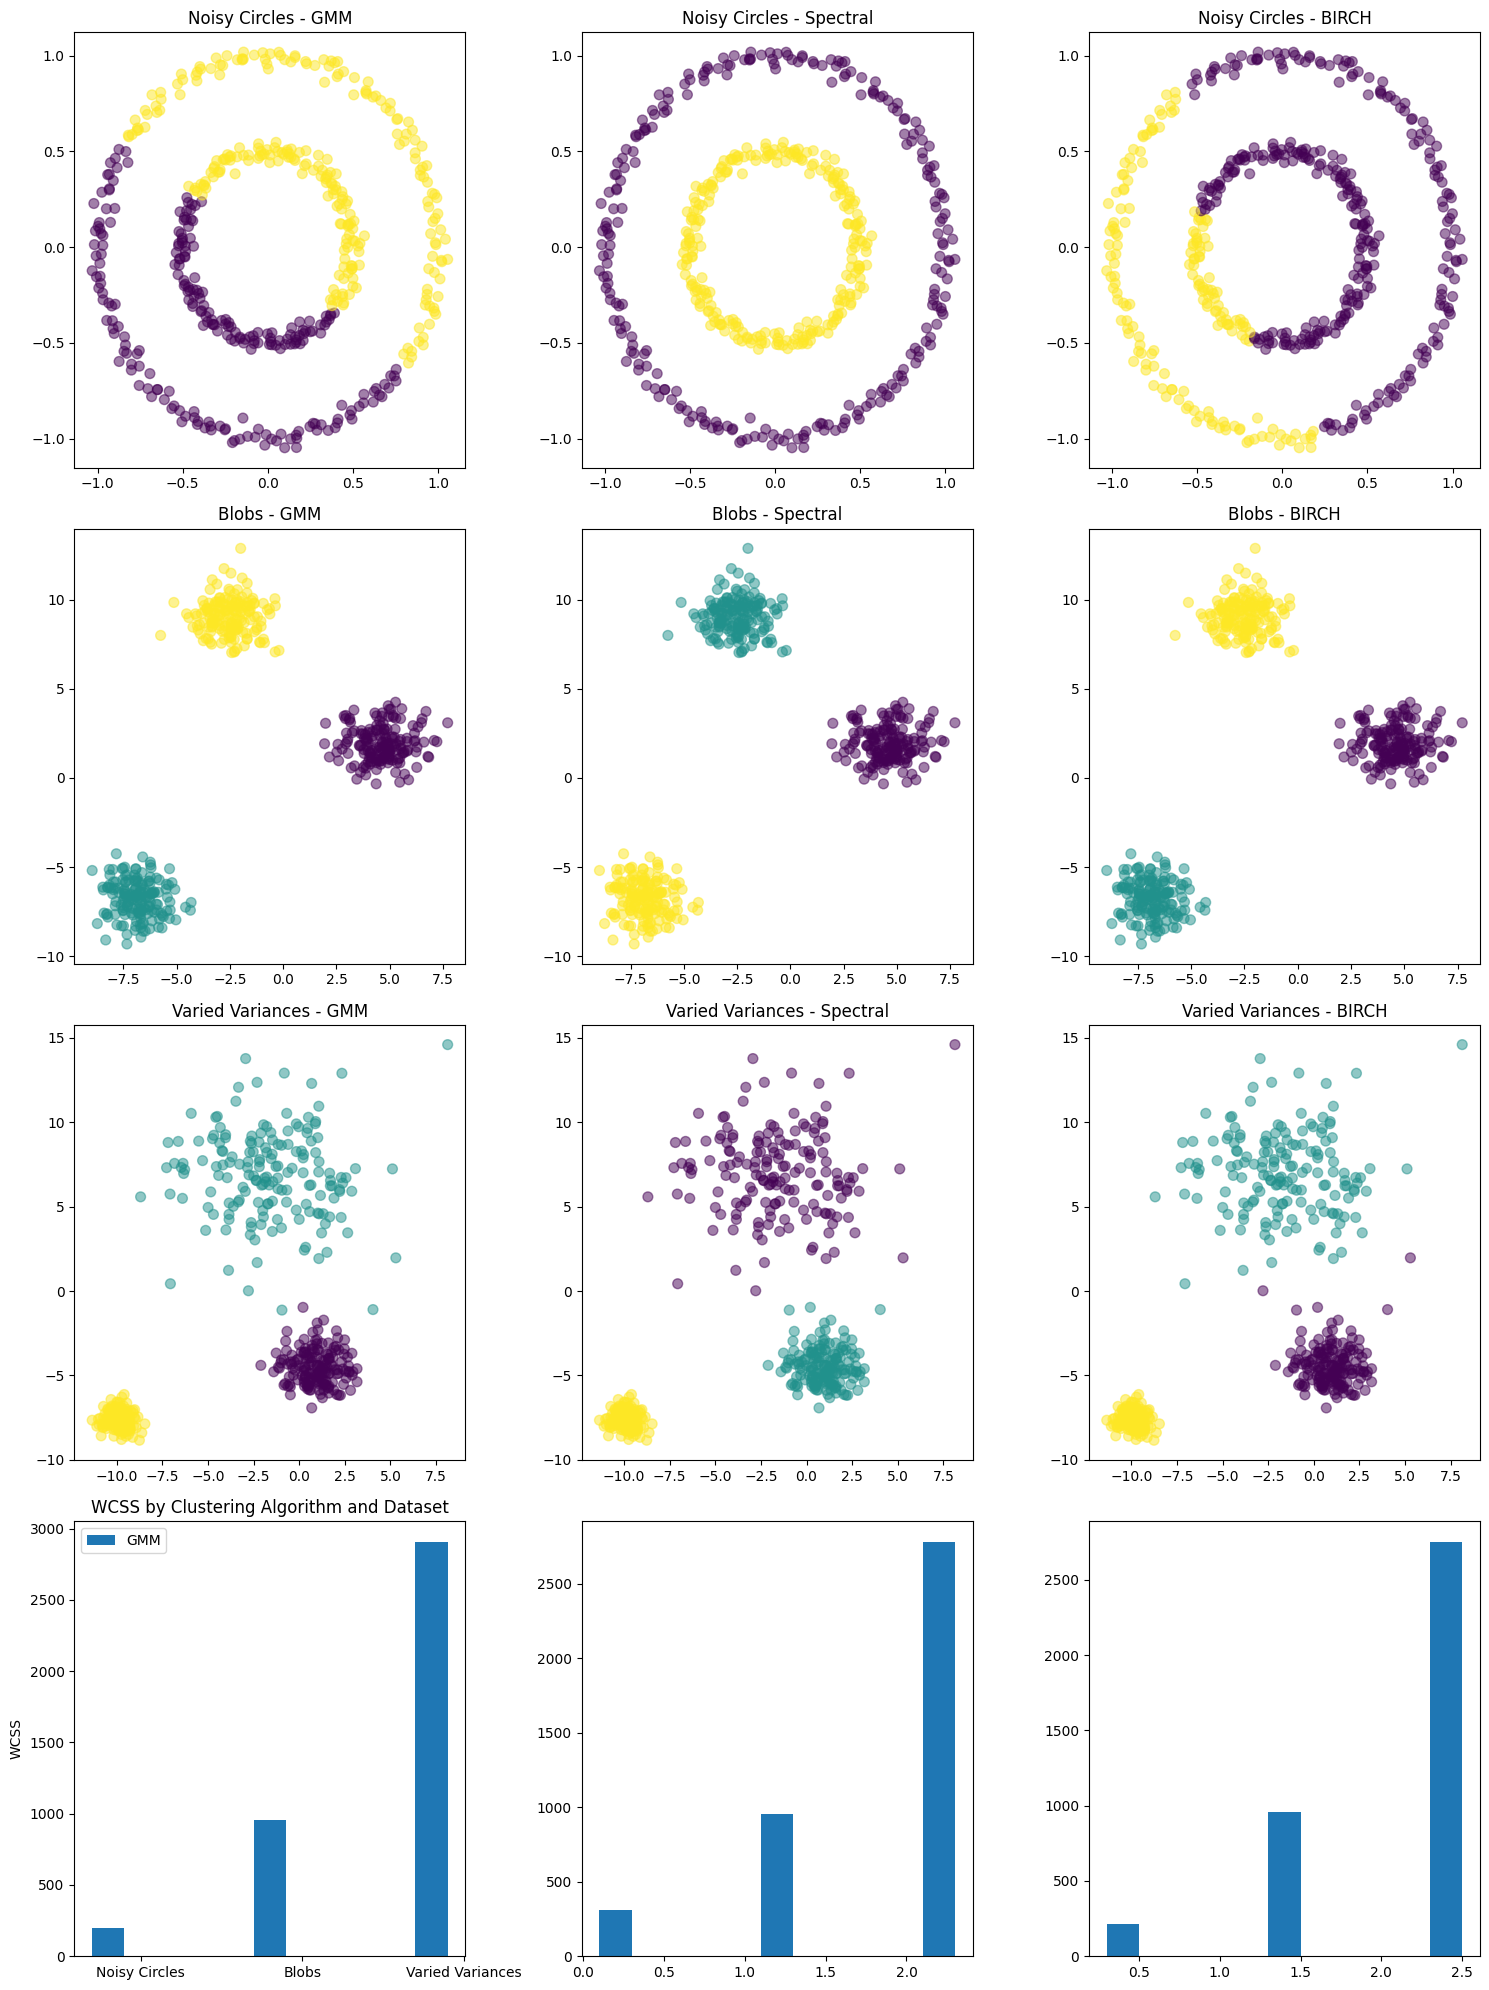

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch, SpectralClustering

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles"),
    (blobs, labels_blobs, "Blobs"),
    (varied, labels_varied, "Varied Variances"),
]

# Function to calculate WCSS
def calculate_wcss(data, labels):
    """Calculate Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Algorithms
algorithms = {
    'GMM': GaussianMixture,
    'Spectral': SpectralClustering,
    'BIRCH': Birch
}

results = []

# Setup figure for scatter plots and bar chart
n_rows = len(datasets)
fig, axs = plt.subplots(n_rows + 1, len(algorithms), figsize=(5 * len(algorithms), 5 * (n_rows + 1)), squeeze=False)

# Apply clustering algorithms and compute WCSS
for idx, (data, true_labels, name) in enumerate(datasets):
    dataset_results = []
    for jdx, (alg_name, Alg) in enumerate(algorithms.items()):
        if name == "Noisy Circles":
            if alg_name == 'GMM':
                model = Alg(n_components=2, random_state=42)
            elif alg_name == 'Spectral':
                model = Alg(n_clusters=2, affinity='nearest_neighbors', gamma=1.0, random_state=42)
            elif alg_name == 'BIRCH':
                model = Birch(n_clusters=2, threshold=0.1)
        else:
            if alg_name == 'GMM':
                model = Alg(n_components=3, random_state=42)
            elif alg_name == 'Spectral':
                model = Alg(n_clusters=3, affinity='rbf', gamma=1.0, random_state=42)
            elif alg_name == 'BIRCH':
                model = Birch(n_clusters=3, threshold=1.0 if name == "Blobs" else 5)

        predicted_labels = model.fit_predict(data)
        wcss = calculate_wcss(data, predicted_labels)
        dataset_results.append(wcss)
        print(f"WCSS for {name} using {alg_name}: {wcss:.2f}")

        # Scatter plot of clusters
        scatter = axs[idx, jdx]
        scatter.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
        scatter.set_title(f'{name} - {alg_name}')

    results.append(dataset_results)

# Plot WCSS for each algorithm across datasets
bar_width = 0.2
index = np.arange(len(datasets))
for i, alg_name in enumerate(algorithms.keys()):
    axs[n_rows, i].bar(index + i * bar_width, [result[i] for result in results], bar_width, label=alg_name)

axs[n_rows, 0].set_ylabel('WCSS')
axs[n_rows, 0].set_title('WCSS by Clustering Algorithm and Dataset')
axs[n_rows, 0].set_xticks(index + bar_width * (len(algorithms) - 1) / 2)
axs[n_rows, 0].set_xticklabels([name for _, _, name in datasets])
axs[n_rows, 0].legend()

# Display all plots
plt.tight_layout()
plt.show()


WCSS for Noisy Circles: 312.22
WCSS for Blobs: 1683.41
WCSS for Varied Variances: 2851.38


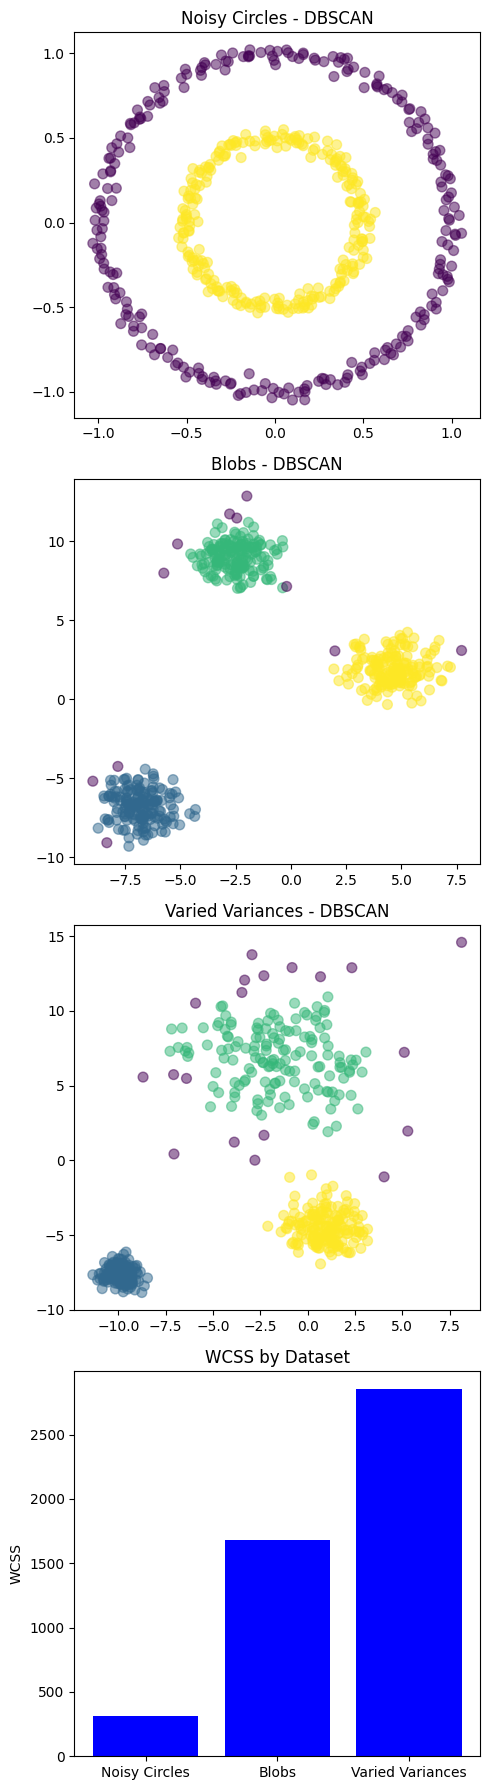

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import DBSCAN

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles"),
    (blobs, labels_blobs, "Blobs"),
    (varied, labels_varied, "Varied Variances"),
]

# Function to calculate WCSS
def calculate_wcss(data, labels):
    """Calculate Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Setup figure for scatter plots
fig, axs = plt.subplots(len(datasets) + 1, 1, figsize=(5, 6 * len(datasets)), squeeze=False)

# Apply DBSCAN clustering and compute WCSS
results = []
dataset_names = []
for idx, (data, true_labels, name) in enumerate(datasets):
    if name == "Noisy Circles":
        model = DBSCAN(eps=0.3, min_samples=5)
    elif name == "Blobs":
        model = DBSCAN(eps=0.8, min_samples=5)
    elif name == "Varied Variances":
        model = DBSCAN(eps=1.3, min_samples=5)

    predicted_labels = model.fit_predict(data)
    wcss = calculate_wcss(data, predicted_labels)
    results.append(wcss)
    dataset_names.append(name)

    print(f"WCSS for {name}: {wcss:.2f}")

    # Scatter plot of clusters
    scatter = axs[idx, 0]
    scatter.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', marker='o', s=50, alpha=0.5)
    scatter.set_title(f'{name} - DBSCAN')

# Plot the WCSS values
axs[len(datasets), 0].bar(dataset_names, results, color='blue')
axs[len(datasets), 0].set_title("WCSS by Dataset")
axs[len(datasets), 0].set_ylabel("WCSS")

# Display all plots
plt.tight_layout()
plt.show()


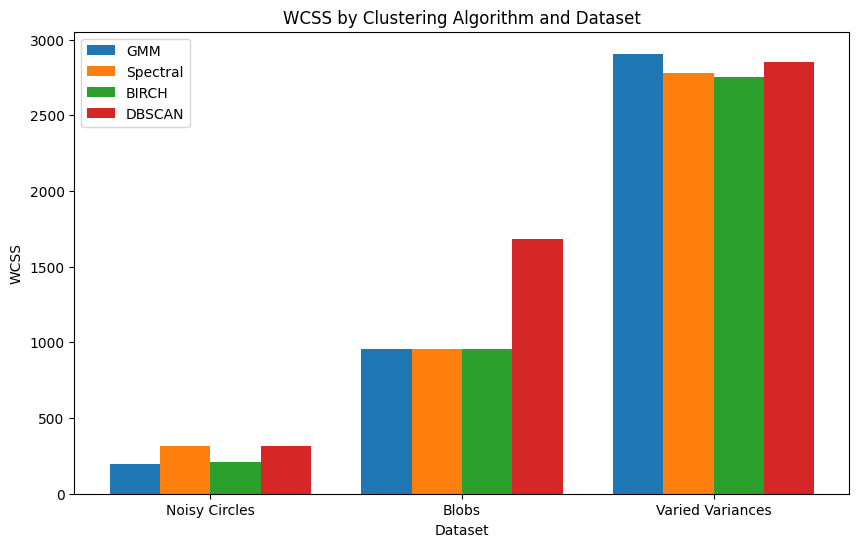

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
datasets = ['Noisy Circles', 'Blobs', 'Varied Variances']
wcss_values = {
    'GMM': [198.04, 955.65, 2906.84],
    'Spectral': [312.22, 955.65, 2782.26],
    'BIRCH': [211.10, 955.65, 2752.71],
    'DBSCAN': [312.22, 1683.41, 2851.38]
}

# Setup bar width and index for the bar chart
bar_width = 0.2
index = np.arange(len(datasets))

fig, ax = plt.subplots(figsize=(10, 6))

# Generate bars for each algorithm
for i, (algorithm, values) in enumerate(wcss_values.items()):
    ax.bar(index + i * bar_width, values, bar_width, label=algorithm)

# Formatting the plot
ax.set_xlabel('Dataset')
ax.set_ylabel('WCSS')
ax.set_title('WCSS by Clustering Algorithm and Dataset')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(datasets)
ax.legend()

plt.show()


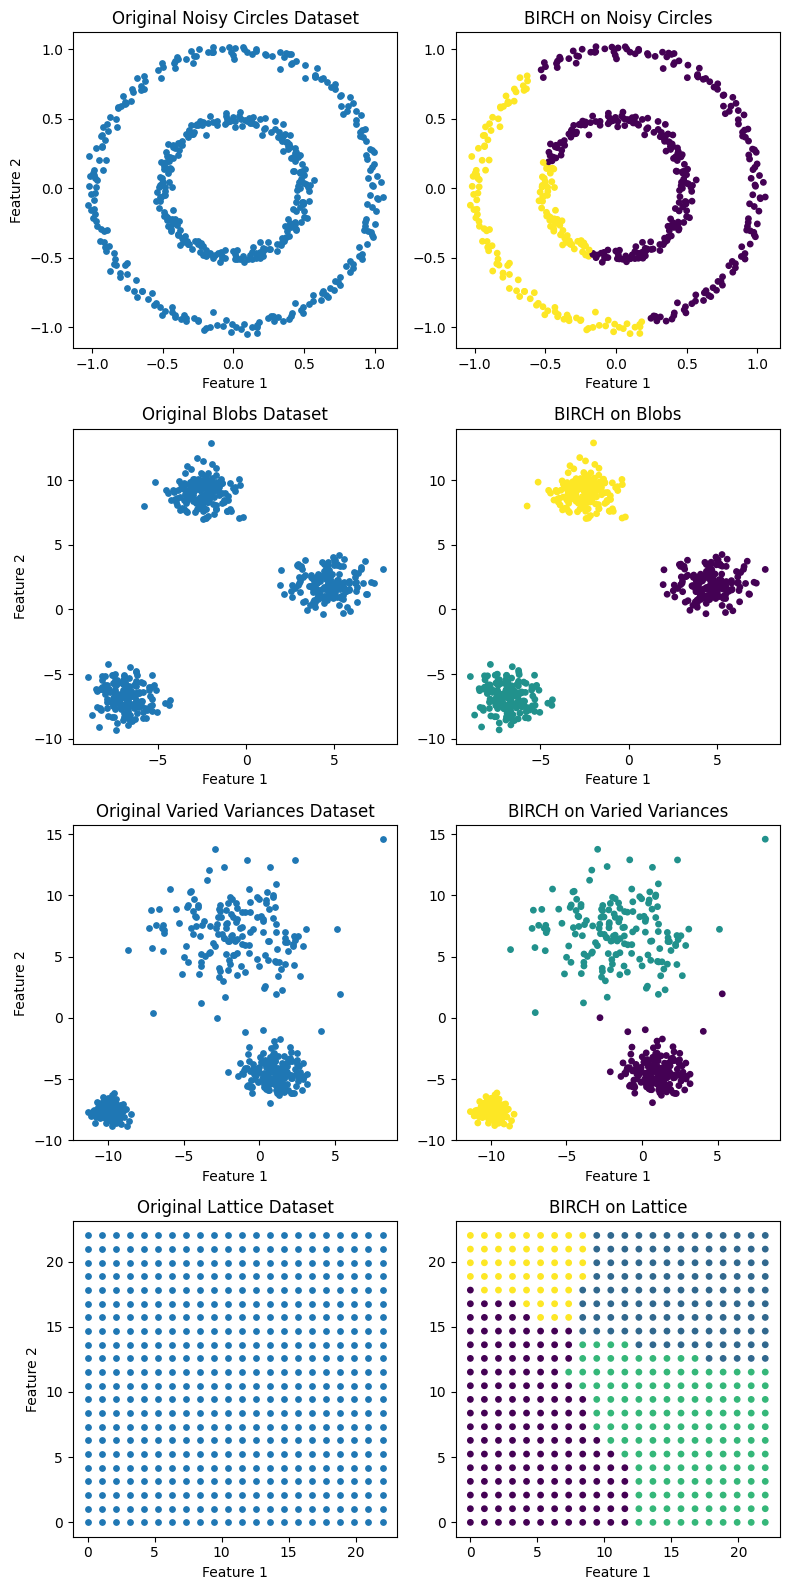

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100
grid_size = 22  # Number of points along one dimension of the grid
spacing = 1.0   # Spacing between points in the grid

# Generate noisy circles dataset
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

# Generate blobs dataset
blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

# Generate varied blobs dataset (different cluster_std for each cluster)
varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

# Generate lattice dataset
x = np.linspace(0, grid_size * spacing, grid_size)
y = np.linspace(0, grid_size * spacing, grid_size)
xx, yy = np.meshgrid(x, y)
lattice_data = np.c_[xx.ravel(), yy.ravel()]  # Flatten the grid into a 2D array

# Apply BIRCH to datasets
birch_circles = Birch(n_clusters=2, threshold=0.1)
clusters_circles = birch_circles.fit_predict(noisy_circles)

birch_blobs = Birch(n_clusters=3, threshold=1.0)
clusters_blobs = birch_blobs.fit_predict(blobs)

birch_varied = Birch(n_clusters=3, threshold=5)
clusters_varied = birch_varied.fit_predict(varied)

birch_lattice = Birch(n_clusters=4, threshold=2.0)
clusters_lattice = birch_lattice.fit_predict(lattice_data)

# Create subplots dynamically
fig, axes = plt.subplots(4, 2, figsize=(8, 16), sharey=False)

datasets = [
    (noisy_circles, clusters_circles, "Noisy Circles"),
    (blobs, clusters_blobs, "Blobs"),
    (varied, clusters_varied, "Varied Variances"),
    (lattice_data, clusters_lattice, "Lattice"),
]

# Plot datasets and clustering results
for i, (data, clusters, title) in enumerate(datasets):
    # Plot original dataset
    axes[i, 0].scatter(data[:, 0], data[:, 1], s=15)
    axes[i, 0].set_title(f"Original {title} Dataset")
    axes[i, 0].set_xlabel("Feature 1")
    axes[i, 0].set_ylabel("Feature 2")

    # Plot BIRCH clustering results
    axes[i, 1].scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=15)
    axes[i, 1].set_title(f"BIRCH on {title}")
    axes[i, 1].set_xlabel("Feature 1")

# Remove any empty subplots if necessary
for j in range(len(datasets), axes.shape[0]):
    for k in range(2):
        fig.delaxes(axes[j, k])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles", 2, 0.1),
    (blobs, labels_blobs, "Blobs", 3, 1.0),
    (varied, labels_varied, "Varied Variances", 3, 1.5),
]

# Functions to calculate WCSS and accuracy
def calculate_wcss(data, labels):
    """Calculate Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

def calculate_accuracy(true_labels, predicted_labels):
    """Calculate clustering accuracy using the Hungarian algorithm."""
    unique_true = np.unique(true_labels)
    unique_pred = np.unique(predicted_labels)
    cost_matrix = np.zeros((len(unique_true), len(unique_pred)))
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            cost_matrix[i, j] = -np.sum((true_labels == true_label) & (predicted_labels == pred_label))
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    return -cost_matrix[row_ind, col_ind].sum() / len(true_labels)

# Initialize lists to store WCSS and accuracy
wcss_list = []
accuracy_list = []

# Apply BIRCH clustering and compute WCSS and accuracy
for data, true_labels, name, n_clusters, threshold in datasets:
    birch = Birch(n_clusters=n_clusters, threshold=threshold)
    predicted_labels = birch.fit_predict(data)

    # Calculate WCSS
    wcss = calculate_wcss(data, predicted_labels)
    wcss_list.append((name, wcss))

    # Calculate accuracy
    accuracy = calculate_accuracy(true_labels, predicted_labels)
    accuracy_list.append((name, accuracy))

# Print WCSS and accuracy results
print("WCSS Results:")
for name, wcss in wcss_list:
    print(f"{name}: {wcss:.2f}")

print("\nAccuracy Results:")
for name, accuracy in accuracy_list:
    print(f"{name}: {accuracy:.2f}")

# Plot WCSS and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot WCSS
datasets_names = [name for name, _ in wcss_list]
wcss_values = [wcss for _, wcss in wcss_list]
axes[0].bar(datasets_names, wcss_values, color='skyblue')
axes[0].set_title("WCSS for Different Datasets", fontsize=14)
axes[0].set_ylabel("WCSS", fontsize=12)
axes[0].set_xlabel("Dataset", fontsize=12)

# Plot Accuracy
accuracy_values = [accuracy for _, accuracy in accuracy_list]
axes[1].bar(datasets_names, accuracy_values, color='lightgreen')
axes[1].set_title("Clustering Accuracy for Different Datasets", fontsize=14)
axes[1].set_ylabel("Accuracy", fontsize=12)
axes[1].set_xlabel("Dataset", fontsize=12)

plt.tight_layout()
plt.show()


## Bank Dataset

In [ ]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/bank_transactions_data_2.csv'
data = pd.read_csv(file_path)

# Inspect the data structure
print(data.head())

# Select relevant features for clustering
features = data[['TransactionAmount', 'CustomerAge']]

# Ensure no missing values in the selected features
features = features.dropna()

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

WCSS for BIRCH clustering: 0.88


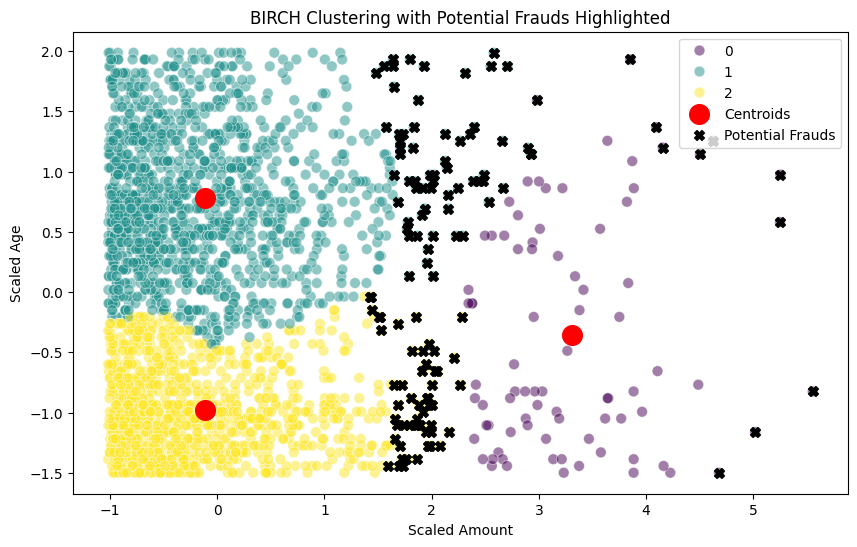

Number of potential frauds detected: 126
Silhouette Score: 0.42
Calinski-Harabasz Score: 1587.58
Davies-Bouldin Score: 0.79


In [ ]:
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features
X = data[['TransactionAmount', 'CustomerAge']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# BIRCH clustering with 3 clusters
birch = Birch(n_clusters=3, threshold=0.7)  # Adjust threshold if needed
birch_labels = birch.fit_predict(X_scaled)

# Add labels to the dataset
data['Birch_Cluster'] = birch_labels

# Calculate distance of each point to its assigned cluster centroid
centroids = np.array([X_scaled[birch_labels == i].mean(axis=0) for i in np.unique(birch_labels)])
distances = np.linalg.norm(X_scaled - centroids[birch_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)

# Flag points above the threshold as potential frauds
data['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = data[data['Potential_Fraud']]
non_frauds = data[~data['Potential_Fraud']]

# Calculate WCSS
def calculate_wcss(data, labels, centroids):
    wcss = 0
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        centroid = centroids[cluster_id]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

wcss = calculate_wcss(X_scaled, birch_labels, centroids)/len(data)
print(f"WCSS for BIRCH clustering: {wcss:.2f}")

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=birch_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1],
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('BIRCH Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

silhouette = silhouette_score(X_scaled, birch_labels)
print(f"Silhouette Score: {silhouette:.2f}")

# Calculate the Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(X_scaled, birch_labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")

# Calculate the Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X_scaled, birch_labels)
print(f"Davies-Bouldin Score: {davies_bouldin:.2f}")


## Expedia

WCSS for BIRCH clustering: 5.08


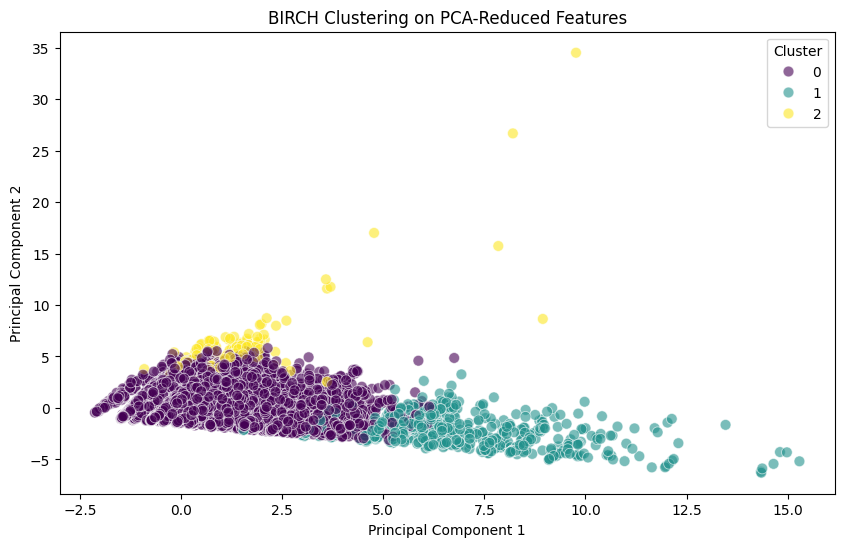

Number of potential frauds detected: 126
Silhouette Score: 0.64
Calinski-Harabasz Score: 5748.60
Davies-Bouldin Score: 0.79


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/travel.csv'
data = pd.read_csv(file_path)

# Feature engineering: Calculate 'travel_duration' and 'days_in_advance'
data['srch_ci'] = pd.to_datetime(data['srch_ci'])
data['srch_co'] = pd.to_datetime(data['srch_co'])
data['date_time'] = pd.to_datetime(data['date_time'])

data['travel_duration'] = (data['srch_co'] - data['srch_ci']).dt.days
data['days_in_advance'] = (data['srch_ci'] - data['date_time']).dt.days

# Select relevant features
features = [
    'travel_duration',
    'days_in_advance',
    'orig_destination_distance',
    'srch_adults_cnt',
    'srch_children_cnt',
    'srch_rm_cnt'
]
X = data[features]

# Drop rows with missing values
X = X.dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply BIRCH clustering
birch = Birch(n_clusters=3, threshold=0.3)
birch_labels = birch.fit_predict(X_scaled)

# Add labels to the dataset
data = data.loc[X.index]  # Keep rows corresponding to valid features
data['Birch_Cluster'] = birch_labels

# Calculate WCSS
def calculate_wcss(data, labels):
    centroids = np.array([data[labels == i].mean(axis=0) for i in np.unique(labels)])
    wcss = sum(np.sum((data[labels == i] - centroids[i]) ** 2) for i in np.unique(labels))
    return wcss

wcss = calculate_wcss(X_scaled, birch_labels)/len(data)
print(f"WCSS for BIRCH clustering: {wcss:.2f}")

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters along the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=birch_labels, palette='viridis', s=60, alpha=0.6
)
plt.title('BIRCH Clustering on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

silhouette = silhouette_score(X_scaled, birch_labels)
print(f"Silhouette Score: {silhouette:.2f}")

# Calculate the Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(X_scaled, birch_labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")

# Calculate the Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X_scaled, birch_labels)
print(f"Davies-Bouldin Score: {davies_bouldin:.2f}")



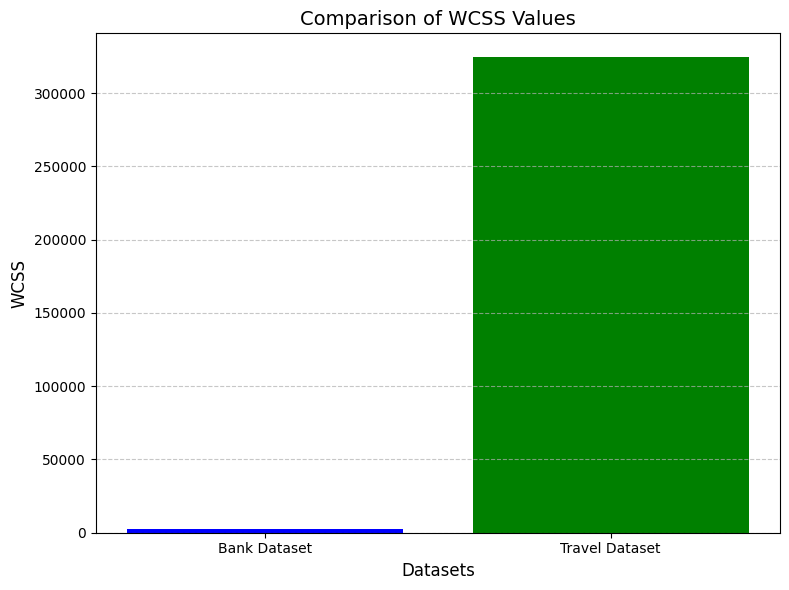

In [ ]:
dts = ["Bank Dataset", "Travel Dataset"]
wcss_values = [2217, 324611.30]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(dts, wcss_values, color=['blue', 'green'])

# Add titles and labels
plt.title("Comparison of WCSS Values", fontsize=14)
plt.ylabel("WCSS", fontsize=12)
plt.xlabel("Datasets", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


## Timing Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ma

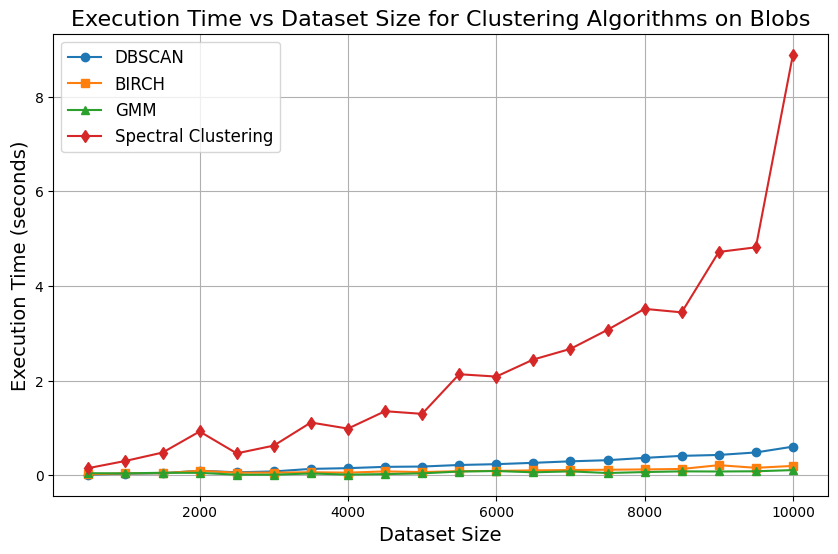

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, Birch, SpectralClustering
from sklearn.mixture import GaussianMixture
import time

# Parameters
sizes = np.arange(500, 10001, 500)  # Dataset sizes from 500 to 10000 in steps of 500
dbscan_times = []
birch_times = []
gmm_times = []
spectral_times = []

# Loop through dataset sizes
for size in sizes:
    a =0
    b =0
    c =0
    d =0
    for abcd in range(5):
      # Generate the blobs dataset
      blobs, _ = make_blobs(
        n_samples=size, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42
    )
      blobs, _ = make_blobs(n_samples=size, centers=3, cluster_std=1.0, random_state=42)

      # --- DBSCAN ---
      start = time.time()
      dbscan = DBSCAN(eps=1.8, min_samples=5)
      dbscan.fit_predict(blobs)
      a+=time.time() - start


      # --- BIRCH ---
      start = time.time()
      birch = Birch(n_clusters=3, threshold=5)
      birch.fit_predict(blobs)
      b+=time.time() - start

      # --- GMM ---
      start = time.time()
      gmm = GaussianMixture(n_components=3, random_state=42)
      gmm.fit(blobs)
      c+=time.time() - start

      # --- Spectral Clustering ---
      start = time.time()
      spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
      spectral.fit(blobs)
      d+=time.time() - start
    spectral_times.append(d/5)
    gmm_times.append(c/5)
    birch_times.append(b/5)
    dbscan_times.append(a/5)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot execution times for each algorithm
plt.plot(sizes, dbscan_times, label='DBSCAN', marker='o')
plt.plot(sizes, birch_times, label='BIRCH', marker='s')
plt.plot(sizes, gmm_times, label='GMM', marker='^')
plt.plot(sizes, spectral_times, label='Spectral Clustering', marker='d')

# Customizing plot
plt.title('Execution Time vs Dataset Size for Clustering Algorithms on Blobs', fontsize=16)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


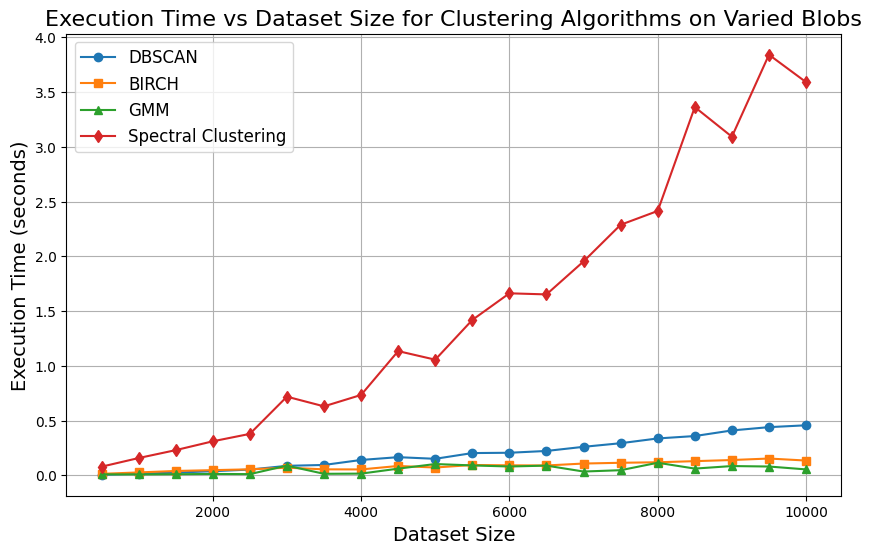

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.cluster import DBSCAN, Birch, SpectralClustering
# from sklearn.mixture import GaussianMixture
# import time

# # Parameters
# sizes = np.arange(500, 10001, 500)  # Dataset sizes from 500 to 10000 in steps of 500
# dbscan_times = []
# birch_times = []
# gmm_times = []
# spectral_times = []

# # Loop through dataset sizes
# for size in sizes:
#     a =0
#     b =0
#     c =0
#     d =0
#     for abcd in range(5):
#       # Generate the blobs dataset
#       blobs, _ = make_blobs(
#         n_samples=size, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42
#     )
#       # blobs, _ = make_blobs(n_samples=size, centers=3, cluster_std=1.0, random_state=42)

#       # --- DBSCAN ---
#       start = time.time()
#       dbscan = DBSCAN(eps=1.8, min_samples=5)
#       dbscan.fit_predict(blobs)
#       a+=time.time() - start


#       # --- BIRCH ---
#       start = time.time()
#       birch = Birch(n_clusters=3, threshold=5)
#       birch.fit_predict(blobs)
#       b+=time.time() - start

#       # --- GMM ---
#       start = time.time()
#       gmm = GaussianMixture(n_components=3, random_state=42)
#       gmm.fit(blobs)
#       c+=time.time() - start

#       # --- Spectral Clustering ---
#       start = time.time()
#       spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
#       spectral.fit(blobs)
#       d+=time.time() - start
#     spectral_times.append(d/5)
#     gmm_times.append(c/5)
#     birch_times.append(b/5)
#     dbscan_times.append(a/5)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot execution times for each algorithm
plt.plot(sizes, dbscan_times, label='DBSCAN', marker='o')
plt.plot(sizes, birch_times, label='BIRCH', marker='s')
plt.plot(sizes, gmm_times, label='GMM', marker='^')
plt.plot(sizes, spectral_times, label='Spectral Clustering', marker='d')

# Customizing plot
plt.title('Execution Time vs Dataset Size for Clustering Algorithms on Varied Blobs', fontsize=16)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


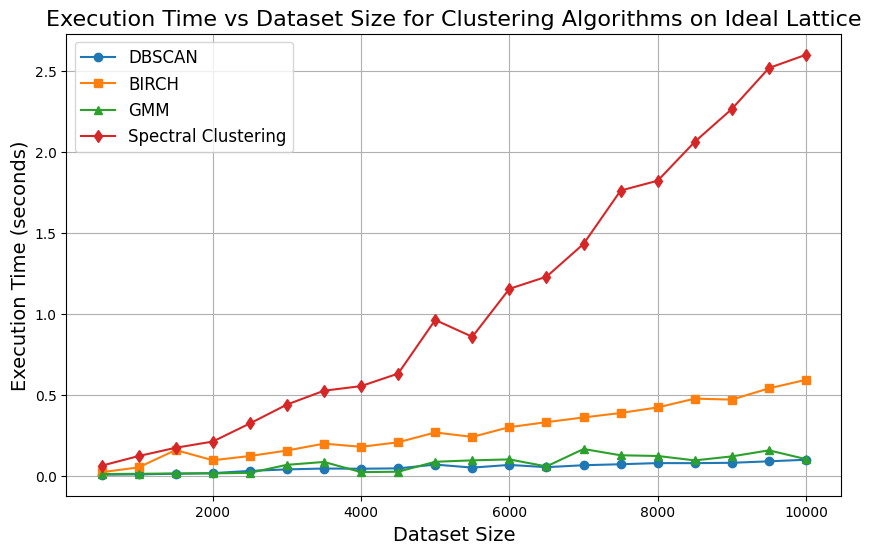

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, Birch, SpectralClustering
from sklearn.mixture import GaussianMixture
import time

# Parameters
sizes = np.arange(500, 10001, 500)  # Dataset sizes from 500 to 10000 in steps of 500
dbscan_times = []
birch_times = []
gmm_times = []
spectral_times = []

# Generate lattice data function
def generate_lattice(size, grid_spacing=1.0):
    grid_side = int(np.sqrt(size))  # Calculate grid side length
    x = np.linspace(0, grid_side * grid_spacing, grid_side)
    y = np.linspace(0, grid_side * grid_spacing, grid_side)
    xx, yy = np.meshgrid(x, y)
    lattice = np.c_[xx.ravel(), yy.ravel()]  # Flatten into 2D array
    return lattice[:size]  # Return only the required number of points

# Loop through dataset sizes
for size in sizes:
    # Generate the lattice dataset
    a =0
    b =0
    c =0
    d =0
    for abcd in range(5):
        lattice = generate_lattice(size)

        # --- DBSCAN ---
        start = time.time()
        dbscan = DBSCAN(eps=1.8, min_samples=5)
        dbscan.fit_predict(lattice)
        a+=time.time() - start

        # --- BIRCH ---
        start = time.time()
        birch = Birch(n_clusters=4, threshold=1.0)
        birch.fit_predict(lattice)
        b+=time.time() - start

        # --- GMM ---
        start = time.time()
        gmm = GaussianMixture(n_components=4, random_state=42)
        gmm.fit(lattice)
        c+=time.time() - start

        # --- Spectral Clustering ---
        start = time.time()
        spectral = SpectralClustering(n_clusters=4, affinity="nearest_neighbors", random_state=42)
        spectral.fit(lattice)
        d+=time.time() - start

    spectral_times.append(d/5)
    gmm_times.append(c/5)
    birch_times.append(b/5)
    dbscan_times.append(a/5)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot execution times for each algorithm
plt.plot(sizes, dbscan_times, label="DBSCAN", marker="o")
plt.plot(sizes, birch_times, label="BIRCH", marker="s")
plt.plot(sizes, gmm_times, label="GMM", marker="^")
plt.plot(sizes, spectral_times, label="Spectral Clustering", marker="d")

# Customizing plot
plt.title("Execution Time vs Dataset Size for Clustering Algorithms on Ideal Lattice", fontsize=16)
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ma

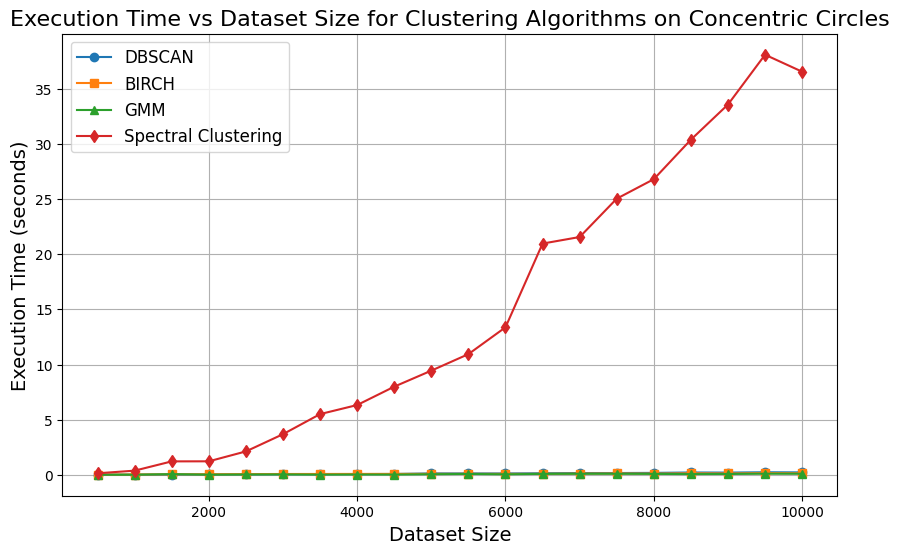

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, Birch, SpectralClustering
from sklearn.mixture import GaussianMixture
import time

# Parameters
sizes = np.arange(500, 10001, 500)  # Dataset sizes from 500 to 10000 in steps of 500
dbscan_times = []
birch_times = []
gmm_times = []
spectral_times = []

# Generate concentric circles dataset
def generate_circles(size, noise=0.03):
    circles, _ = make_circles(n_samples=size, factor=0.5, noise=noise, random_state=42)
    return circles

# Loop through dataset sizes
for size in sizes:
    # Generate the concentric circles dataset
    a =0
    b =0
    c =0
    d =0
    for abcd in range(5):
        circles = generate_circles(size)

        # --- DBSCAN ---
        start = time.time()
        dbscan = DBSCAN(eps=0.2, min_samples=5)  # Lower eps for circular structures
        dbscan.fit_predict(circles)
        a+=time.time() - start

        # --- BIRCH ---
        start = time.time()
        birch = Birch(n_clusters=2, threshold=0.1)  # Optimized for tighter clusters
        birch.fit_predict(circles)
        b+=time.time() - start

        # --- GMM ---
        start = time.time()
        gmm = GaussianMixture(n_components=2, random_state=42)
        gmm.fit(circles)
        c+=time.time() - start

        # --- Spectral Clustering ---
        start = time.time()
        spectral = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", random_state=42)
        spectral.fit(circles)
        d+=time.time() - start
    spectral_times.append(d/5)
    gmm_times.append(c/5)
    birch_times.append(b/5)
    dbscan_times.append(a/5)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot execution times for each algorithm
plt.plot(sizes, dbscan_times, label="DBSCAN", marker="o")
plt.plot(sizes, birch_times, label="BIRCH", marker="s")
plt.plot(sizes, gmm_times, label="GMM", marker="^")
plt.plot(sizes, spectral_times, label="Spectral Clustering", marker="d")

# Customizing plot
plt.title("Execution Time vs Dataset Size for Clustering Algorithms on Concentric Circles", fontsize=16)
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate datasets
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

datasets = [
    (noisy_circles, labels_circles, "Noisy Circles", 2, 0.1),
    (blobs, labels_blobs, "Blobs", 3, 1.0),
    (varied, labels_varied, "Varied Variances", 3, 1.5),
]

# Functions to calculate WCSS and accuracy
def calculate_wcss(data, labels):
    """Calculate Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

def calculate_accuracy(true_labels, predicted_labels):
    """Calculate clustering accuracy using the Hungarian algorithm."""
    unique_true = np.unique(true_labels)
    unique_pred = np.unique(predicted_labels)
    cost_matrix = np.zeros((len(unique_true), len(unique_pred)))
    for i, true_label in enumerate(unique_true):
        for j, pred_label in enumerate(unique_pred):
            cost_matrix[i, j] = -np.sum((true_labels == true_label) & (predicted_labels == pred_label))
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    return -cost_matrix[row_ind, col_ind].sum() / len(true_labels)

# Initialize lists to store WCSS and accuracy
wcss_list = []
accuracy_list = []

# Apply BIRCH clustering and compute WCSS and accuracy
for data, true_labels, name, n_clusters, threshold in datasets:
    birch = Birch(n_clusters=n_clusters, threshold=threshold)
    predicted_labels = birch.fit_predict(data)

    # Calculate WCSS
    wcss = calculate_wcss(data, predicted_labels)
    wcss_list.append((name, wcss))

    # Calculate accuracy
    accuracy = calculate_accuracy(true_labels, predicted_labels)
    accuracy_list.append((name, accuracy))

# Print WCSS and accuracy results
print("WCSS Results:")
for name, wcss in wcss_list:
    print(f"{name}: {wcss:.2f}")

print("\nAccuracy Results:")
for name, accuracy in accuracy_list:
    print(f"{name}: {accuracy:.2f}")

# Plot WCSS and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot WCSS
datasets_names = [name for name, _ in wcss_list]
wcss_values = [wcss for _, wcss in wcss_list]
axes[0].bar(datasets_names, wcss_values, color='skyblue')
axes[0].set_title("WCSS for Different Datasets", fontsize=14)
axes[0].set_ylabel("WCSS", fontsize=12)
axes[0].set_xlabel("Dataset", fontsize=12)

# Plot Accuracy
accuracy_values = [accuracy for _, accuracy in accuracy_list]
axes[1].bar(datasets_names, accuracy_values, color='lightgreen')
axes[1].set_title("Clustering Accuracy for Different Datasets", fontsize=14)
axes[1].set_ylabel("Accuracy", fontsize=12)
axes[1].set_xlabel("Dataset", fontsize=12)

plt.tight_layout()
plt.show()


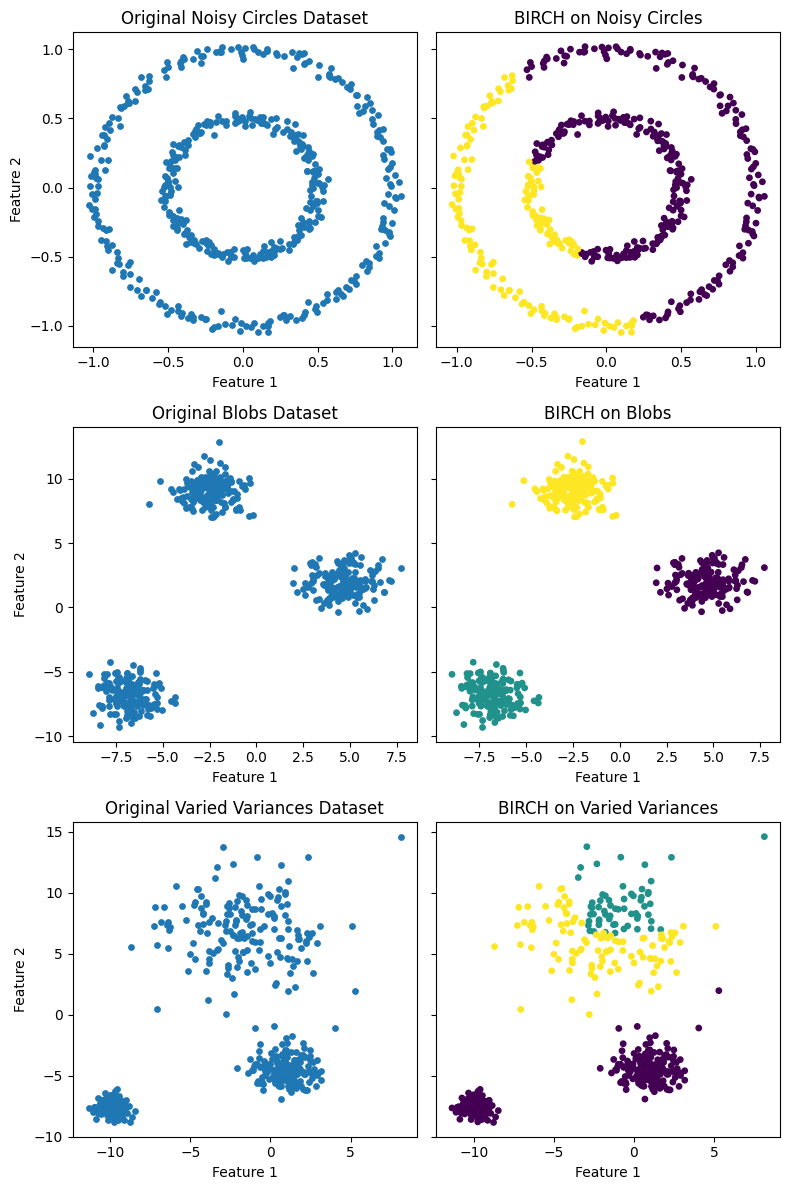

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch

# Parameters
n_samples = 640
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate noisy circles dataset
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

# Generate blobs dataset
blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

# Generate varied blobs dataset (different cluster_std for each cluster)
varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

# Apply BIRCH to the noisy circles dataset
birch_circles = Birch(n_clusters=2, threshold=0.1)
clusters_circles = birch_circles.fit_predict(noisy_circles)

# Apply BIRCH to the blobs dataset
birch_blobs = Birch(n_clusters=3, threshold=1.0)
clusters_blobs = birch_blobs.fit_predict(blobs)

# Apply BIRCH to the varied dataset
birch_varied = Birch(n_clusters=3, threshold=1.5)
clusters_varied = birch_varied.fit_predict(varied)

# Create subplots for three datasets and BIRCH results
fig, axes = plt.subplots(3, 2, figsize=(8, 12), sharey='row')

# Plot original noisy circles dataset
axes[0, 0].scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=15)
axes[0, 0].set_title("Original Noisy Circles Dataset")
axes[0, 0].set_xlabel("Feature 1")
axes[0, 0].set_ylabel("Feature 2")

# Plot BIRCH results for noisy circles
axes[0, 1].scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=clusters_circles, cmap='viridis', s=15)
axes[0, 1].set_title("BIRCH on Noisy Circles")
axes[0, 1].set_xlabel("Feature 1")

# Plot original blobs dataset
axes[1, 0].scatter(blobs[:, 0], blobs[:, 1], s=15)
axes[1, 0].set_title("Original Blobs Dataset")
axes[1, 0].set_xlabel("Feature 1")
axes[1, 0].set_ylabel("Feature 2")

# Plot BIRCH results for blobs
axes[1, 1].scatter(blobs[:, 0], blobs[:, 1], c=clusters_blobs, cmap='viridis', s=15)
axes[1, 1].set_title("BIRCH on Blobs")
axes[1, 1].set_xlabel("Feature 1")

# Plot original varied dataset (different variances in clusters)
axes[2, 0].scatter(varied[:, 0], varied[:, 1], s=15)
axes[2, 0].set_title("Original Varied Variances Dataset")
axes[2, 0].set_xlabel("Feature 1")
axes[2, 0].set_ylabel("Feature 2")

# Plot BIRCH results for varied dataset
axes[2, 1].scatter(varied[:, 0], varied[:, 1], c=clusters_varied, cmap='viridis', s=15)
axes[2, 1].set_title("BIRCH on Varied Variances")
axes[2, 1].set_xlabel("Feature 1")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


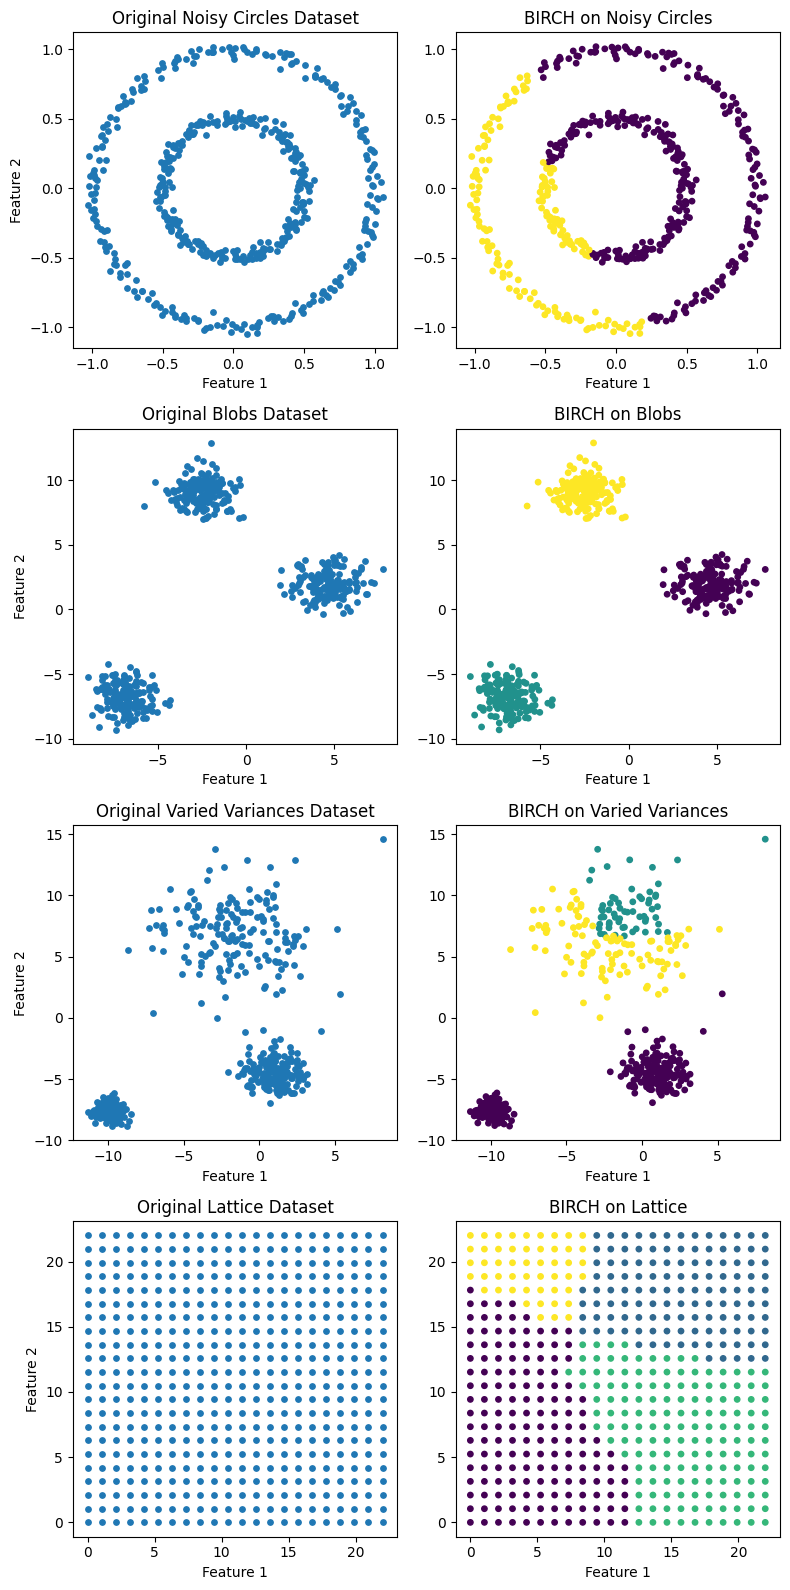

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100
grid_size = 22  # Number of points along one dimension of the grid
spacing = 1.0   # Spacing between points in the grid

# Generate noisy circles dataset
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

# Generate blobs dataset
blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

# Generate varied blobs dataset (different cluster_std for each cluster)
varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

# Generate lattice dataset
x = np.linspace(0, grid_size * spacing, grid_size)
y = np.linspace(0, grid_size * spacing, grid_size)
xx, yy = np.meshgrid(x, y)
lattice_data = np.c_[xx.ravel(), yy.ravel()]  # Flatten the grid into a 2D array

# Apply BIRCH to datasets
birch_circles = Birch(n_clusters=2, threshold=0.1)
clusters_circles = birch_circles.fit_predict(noisy_circles)

birch_blobs = Birch(n_clusters=3, threshold=1.0)
clusters_blobs = birch_blobs.fit_predict(blobs)

birch_varied = Birch(n_clusters=3, threshold=1.5)
clusters_varied = birch_varied.fit_predict(varied)

birch_lattice = Birch(n_clusters=4, threshold=2.0)
clusters_lattice = birch_lattice.fit_predict(lattice_data)

# Create subplots dynamically
fig, axes = plt.subplots(4, 2, figsize=(8, 16), sharey=False)

datasets = [
    (noisy_circles, clusters_circles, "Noisy Circles"),
    (blobs, clusters_blobs, "Blobs"),
    (varied, clusters_varied, "Varied Variances"),
    (lattice_data, clusters_lattice, "Lattice"),
]

# Plot datasets and clustering results
for i, (data, clusters, title) in enumerate(datasets):
    # Plot original dataset
    axes[i, 0].scatter(data[:, 0], data[:, 1], s=15)
    axes[i, 0].set_title(f"Original {title} Dataset")
    axes[i, 0].set_xlabel("Feature 1")
    axes[i, 0].set_ylabel("Feature 2")

    # Plot BIRCH clustering results
    axes[i, 1].scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=15)
    axes[i, 1].set_title(f"BIRCH on {title}")
    axes[i, 1].set_xlabel("Feature 1")

# Remove any empty subplots if necessary
for j in range(len(datasets), axes.shape[0]):
    for k in range(2):
        fig.delaxes(axes[j, k])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


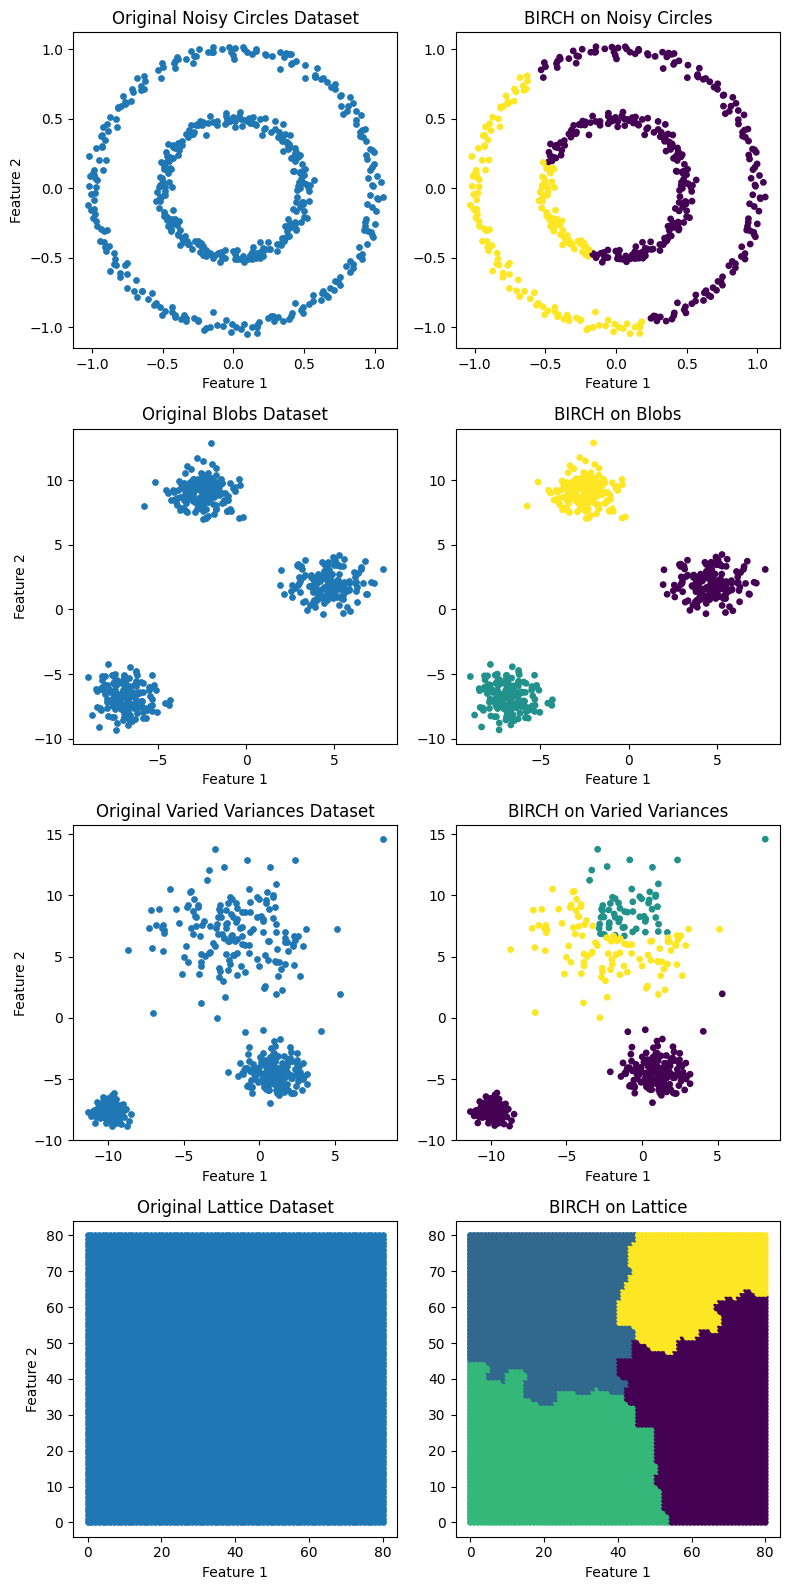

In [ ]:
# Create subplots dynamically based on the number of datasets
fig, axes = plt.subplots(4, 2, figsize=(8, 16), sharey=False)

datasets = [
    (noisy_circles, clusters_circles, "Noisy Circles"),
    (blobs, clusters_blobs, "Blobs"),
    (varied, clusters_varied, "Varied Variances"),
    (lattice_data, clusters_lattice, "Lattice"),
]

# Plot datasets and clustering results
for i, (data, clusters, title) in enumerate(datasets):
    # Plot original dataset
    axes[i, 0].scatter(data[:, 0], data[:, 1], s=15)
    axes[i, 0].set_title(f"Original {title} Dataset")
    axes[i, 0].set_xlabel("Feature 1")
    axes[i, 0].set_ylabel("Feature 2")

    # Plot BIRCH clustering results
    axes[i, 1].scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=15)
    axes[i, 1].set_title(f"BIRCH on {title}")
    axes[i, 1].set_xlabel("Feature 1")

# Remove any empty subplots if necessary
for j in range(len(datasets), axes.shape[0]):
    for k in range(2):
        fig.delaxes(axes[j, k])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


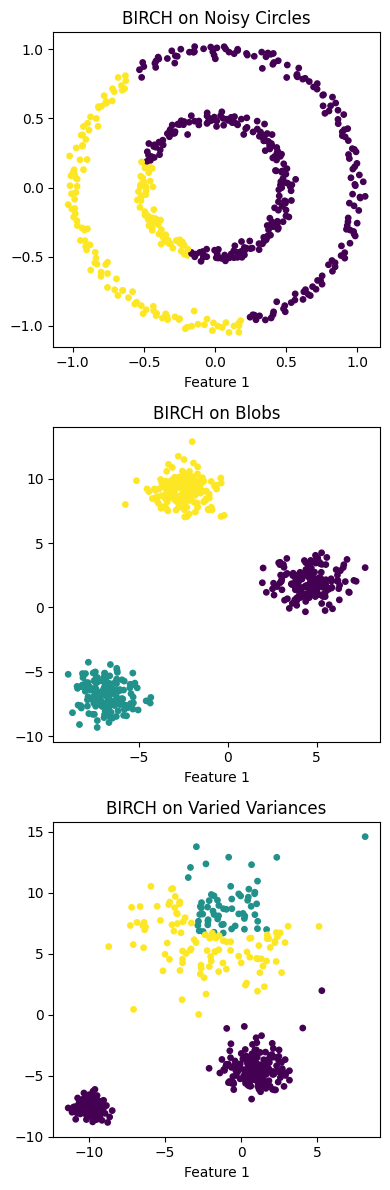

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate noisy circles dataset
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

# Generate blobs dataset
blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

# Generate varied blobs dataset (different cluster_std for each cluster)
varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

# Apply BIRCH to the noisy circles dataset
birch_circles = Birch(n_clusters=2, threshold=0.1)
clusters_circles = birch_circles.fit_predict(noisy_circles)

# Apply BIRCH to the blobs dataset
birch_blobs = Birch(n_clusters=3, threshold=1.0)
clusters_blobs = birch_blobs.fit_predict(blobs)

# Apply BIRCH to the varied dataset
birch_varied = Birch(n_clusters=3, threshold=1.5)
clusters_varied = birch_varied.fit_predict(varied)

# Create subplots for three datasets and BIRCH results
fig, axes = plt.subplots(3, 1, figsize=(4, 12), sharey='row')

# Plot original noisy circles dataset


# Plot BIRCH results for noisy circles
axes[0].scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=clusters_circles, cmap='viridis', s=15)
axes[0].set_title("BIRCH on Noisy Circles")
axes[0].set_xlabel("Feature 1")

# Plot original blobs dataset


# Plot BIRCH results for blobs
axes[1].scatter(blobs[:, 0], blobs[:, 1], c=clusters_blobs, cmap='viridis', s=15)
axes[1].set_title("BIRCH on Blobs")
axes[1].set_xlabel("Feature 1")

# Plot original varied dataset (different variances in clusters)

# Plot BIRCH results for varied dataset
axes[2].scatter(varied[:, 0], varied[:, 1], c=clusters_varied, cmap='viridis', s=15)
axes[2].set_title("BIRCH on Varied Variances")
axes[2].set_xlabel("Feature 1")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


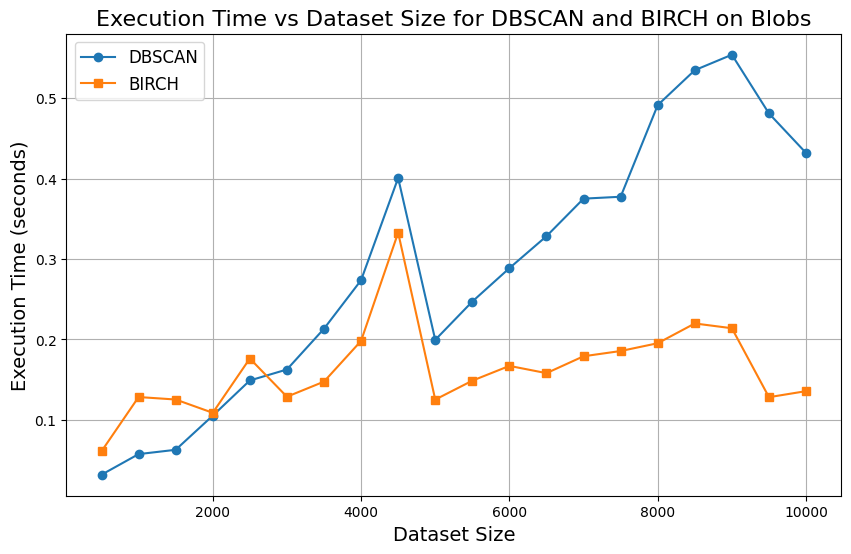

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, Birch
import time

# Parameters
sizes = np.arange(500, 10001, 500)  # Dataset sizes from 500 to 5000 in steps of 500
dbscan_times = []
birch_times = []

# Loop through dataset sizes
for size in sizes:
    # Generate the blobs dataset
    blobs, _ = make_blobs(n_samples=size, centers=3, cluster_std=1.0, random_state=42)

    # --- DBSCAN ---
    start = time.time()
    dbscan = DBSCAN(eps=1.8, min_samples=5)
    dbscan.fit_predict(blobs)
    dbscan_times.append(time.time() - start)

    # --- BIRCH ---
    start = time.time()
    birch = Birch(n_clusters=3, threshold=1.0)
    birch.fit_predict(blobs)
    birch_times.append(time.time() - start)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot DBSCAN and BIRCH times
plt.plot(sizes, dbscan_times, label='DBSCAN', marker='o')
plt.plot(sizes, birch_times, label='BIRCH', marker='s')

# Customizing plot
plt.title('Execution Time vs Dataset Size for DBSCAN and BIRCH on Blobs', fontsize=16)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


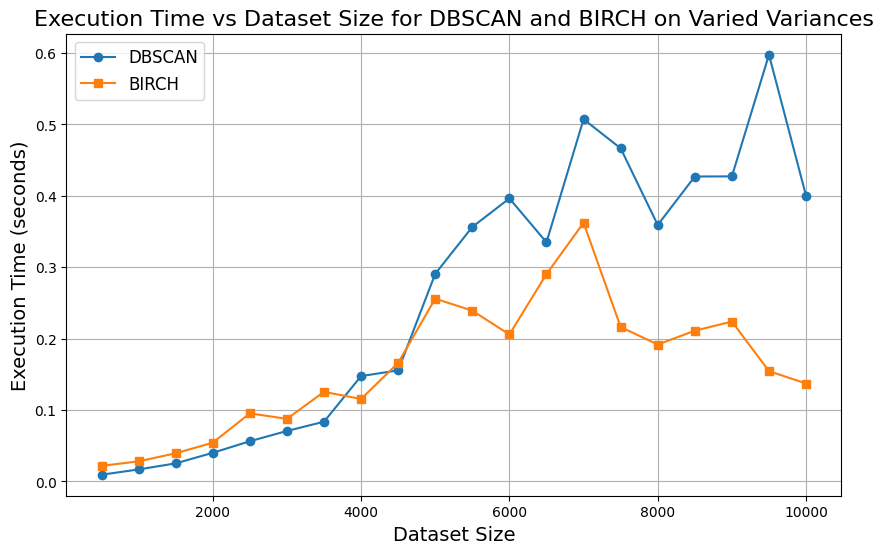

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, Birch
import time

# Parameters
sizes = np.arange(500, 10001, 500)  # Dataset sizes from 500 to 5000 in steps of 500
dbscan_times = []
birch_times = []

# Loop through dataset sizes
for size in sizes:
    # Generate the Varied Variances dataset
    varied, _ = make_blobs(n_samples=size, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=100)

    # --- DBSCAN ---
    start = time.time()
    dbscan = DBSCAN(eps=1.5, min_samples=5)
    dbscan.fit_predict(varied)
    dbscan_times.append(time.time() - start)

    # --- BIRCH ---
    start = time.time()
    birch = Birch(n_clusters=3, threshold=1.5)
    birch.fit_predict(varied)
    birch_times.append(time.time() - start)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot DBSCAN and BIRCH times
plt.plot(sizes, dbscan_times, label='DBSCAN', marker='o')
plt.plot(sizes, birch_times, label='BIRCH', marker='s')

# Customizing plot
plt.title('Execution Time vs Dataset Size for DBSCAN and BIRCH on Varied Variances', fontsize=16)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


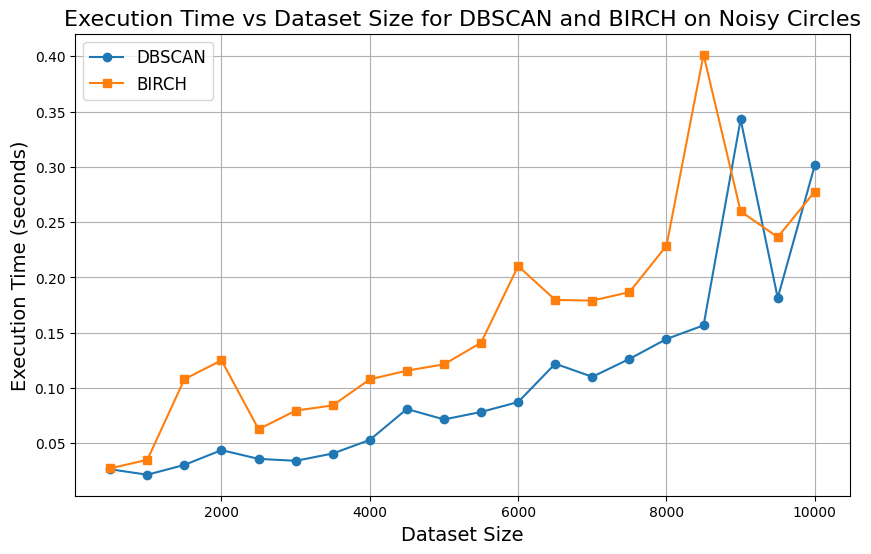

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, Birch
import time

# Parameters
sizes = np.arange(500, 10001, 500)  # Dataset sizes from 500 to 5000 in steps of 500
dbscan_times = []
birch_times = []

# Loop through dataset sizes
for size in sizes:
    # Generate the Noisy Circles dataset
    noisy_circles, _ = make_circles(n_samples=size, factor=0.5, noise=0.03, random_state=4)

    # --- DBSCAN ---
    start = time.time()
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    dbscan.fit_predict(noisy_circles)
    dbscan_times.append(time.time() - start)

    # --- BIRCH ---
    start = time.time()
    birch = Birch(n_clusters=2, threshold=0.1)
    birch.fit_predict(noisy_circles)
    birch_times.append(time.time() - start)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot DBSCAN and BIRCH times
plt.plot(sizes, dbscan_times, label='DBSCAN', marker='o')
plt.plot(sizes, birch_times, label='BIRCH', marker='s')

# Customizing plot
plt.title('Execution Time vs Dataset Size for DBSCAN and BIRCH on Noisy Circles', fontsize=16)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


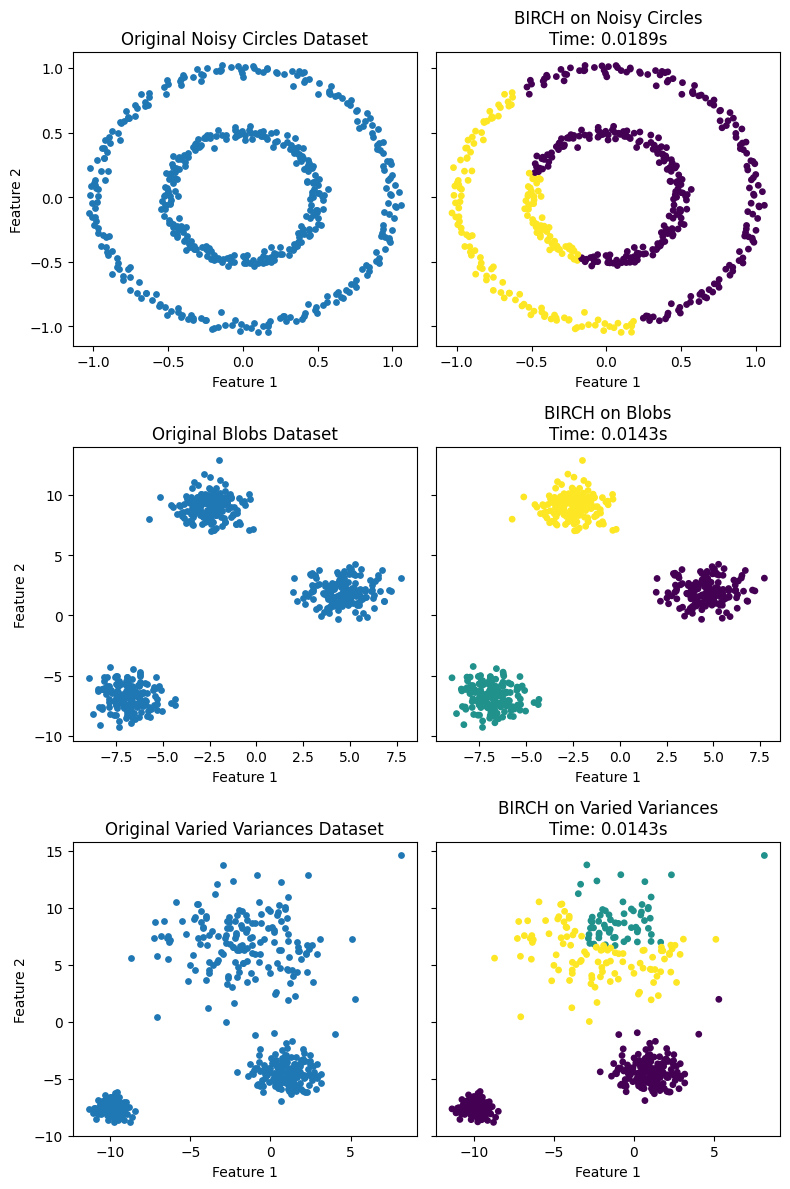

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import Birch
import time  # For measuring execution time

# Parameters
n_samples = 500
seed_circles = 4
seed_blobs = 42
seed_varied = 100

# Generate noisy circles dataset
noisy_circles, labels_circles = make_circles(
    n_samples=n_samples, factor=0.5, noise=0.03, random_state=seed_circles
)

# Generate blobs dataset
blobs, labels_blobs = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=1.0, random_state=seed_blobs
)

# Generate varied blobs dataset (different cluster_std for each cluster)
varied, labels_varied = make_blobs(
    n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=seed_varied
)

# Measure and apply BIRCH to the noisy circles dataset
start = time.time()
birch_circles = Birch(n_clusters=2, threshold=0.1)
clusters_circles = birch_circles.fit_predict(noisy_circles)
time_circles = time.time() - start

# Measure and apply BIRCH to the blobs dataset
start = time.time()
birch_blobs = Birch(n_clusters=3, threshold=1.0)
clusters_blobs = birch_blobs.fit_predict(blobs)
time_blobs = time.time() - start

# Measure and apply BIRCH to the varied dataset
start = time.time()
birch_varied = Birch(n_clusters=3, threshold=1.5)
clusters_varied = birch_varied.fit_predict(varied)
time_varied = time.time() - start

# Create subplots for three datasets and BIRCH results
fig, axes = plt.subplots(3, 2, figsize=(8, 12), sharey='row')

# Plot original noisy circles dataset
axes[0, 0].scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=15)
axes[0, 0].set_title("Original Noisy Circles Dataset")
axes[0, 0].set_xlabel("Feature 1")
axes[0, 0].set_ylabel("Feature 2")

# Plot BIRCH results for noisy circles
axes[0, 1].scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=clusters_circles, cmap='viridis', s=15)
axes[0, 1].set_title(f"BIRCH on Noisy Circles\nTime: {time_circles:.4f}s")
axes[0, 1].set_xlabel("Feature 1")

# Plot original blobs dataset
axes[1, 0].scatter(blobs[:, 0], blobs[:, 1], s=15)
axes[1, 0].set_title("Original Blobs Dataset")
axes[1, 0].set_xlabel("Feature 1")
axes[1, 0].set_ylabel("Feature 2")

# Plot BIRCH results for blobs
axes[1, 1].scatter(blobs[:, 0], blobs[:, 1], c=clusters_blobs, cmap='viridis', s=15)
axes[1, 1].set_title(f"BIRCH on Blobs\nTime: {time_blobs:.4f}s")
axes[1, 1].set_xlabel("Feature 1")

# Plot original varied dataset (different variances in clusters)
axes[2, 0].scatter(varied[:, 0], varied[:, 1], s=15)
axes[2, 0].set_title("Original Varied Variances Dataset")
axes[2, 0].set_xlabel("Feature 1")
axes[2, 0].set_ylabel("Feature 2")

# Plot BIRCH results for varied dataset
axes[2, 1].scatter(varied[:, 0], varied[:, 1], c=clusters_varied, cmap='viridis', s=15)
axes[2, 1].set_title(f"BIRCH on Varied Variances\nTime: {time_varied:.4f}s")
axes[2, 1].set_xlabel("Feature 1")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


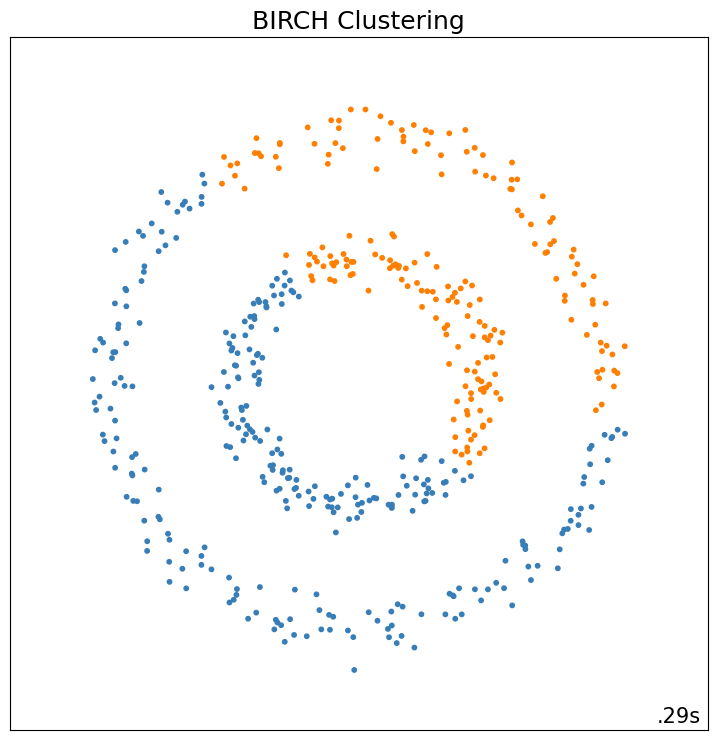

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch

# Generate datasets
n_samples = 500
random_state = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=random_state)

X, y = noisy_circles
X = StandardScaler().fit_transform(X)

# Create BIRCH cluster object
birch = Birch(n_clusters=2)

t0 = time.time()
birch.fit(X)
t1 = time.time()

# Predict the cluster labels
y_pred = birch.labels_.astype(int)

# Plotting
plt.figure(figsize=(9, 9))
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.title('BIRCH Clustering', size=18)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.text(0.99, 0.01, ("%.2fs" % (t1 - t0)).lstrip("0"), transform=plt.gca().transAxes, size=15, horizontalalignment="right")
plt.show()


In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

import random
random.seed(25)

In [ ]:
import numpy as np

def generate_gaussian_cluster(mean, n_points, cov):
    data = np.random.multivariate_normal(mean, cov, n_points)
    return data

def generate_N2_blobs(N, points_per_blob):
    var = 0.01
    labels = []
    Full_Data = np.empty((0, 2))
    for i in range(N):
        for j in range(N):
            mean = [i, j]
            cov = [[var, 0], [0, var]]
            blob_data = generate_gaussian_cluster(mean, points_per_blob, cov)
            Full_Data = np.vstack([Full_Data, blob_data])
            labels.extend([i * N + j] * points_per_blob)
    return Full_Data, labels

data, labels = generate_N2_blobs(2, 50)

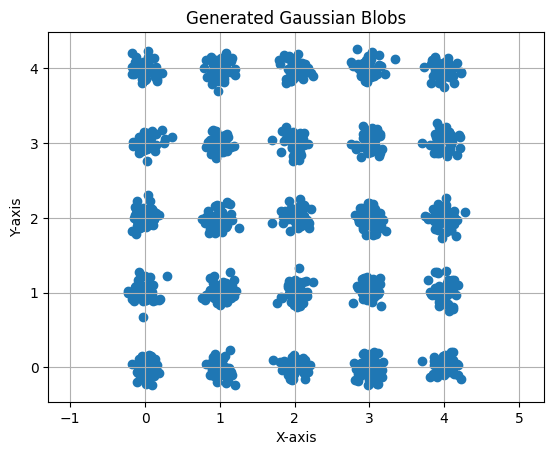

In [ ]:
import matplotlib.pyplot as plt

def plot_data(data, labels):
    plt.scatter(data[:, 0], data[:, 1], alpha=1)
    plt.title("Generated Gaussian Blobs")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

data, labels = generate_N2_blobs(5, 50)
plot_data(np.array(data), labels)


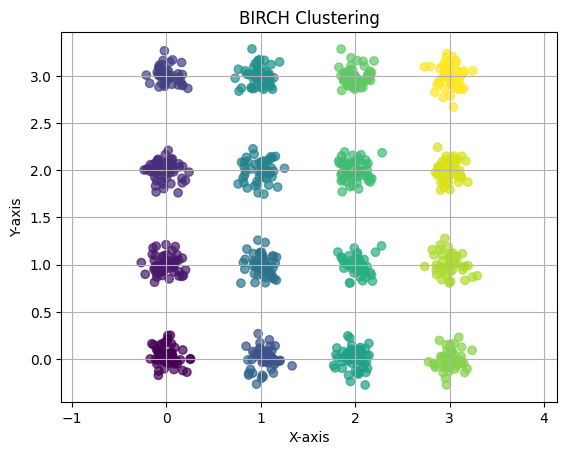

In [ ]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt

# Run BIRCH clustering
def run_birch_clustering(data, n_clusters=None, threshold=0.5):
    birch = Birch(n_clusters=n_clusters, threshold=threshold)
    labels = birch.fit_predict(data)
    return labels

# Plot data with BIRCH clustering labels
def plot_birch_clusters(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, alpha=0.7)
    plt.title("BIRCH Clustering")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Example usage
data, _ = generate_N2_blobs(4, 50)  # Generate dataset
labels = run_birch_clustering(data, threshold=0.2)  # Run BIRCH clustering
plot_birch_clusters(np.array(data), labels)  # Plot clustered data


Silhouette Score: 0.3449
Calinski-Harabasz Index: 4766.7217
Davies-Bouldin Index: 0.8211


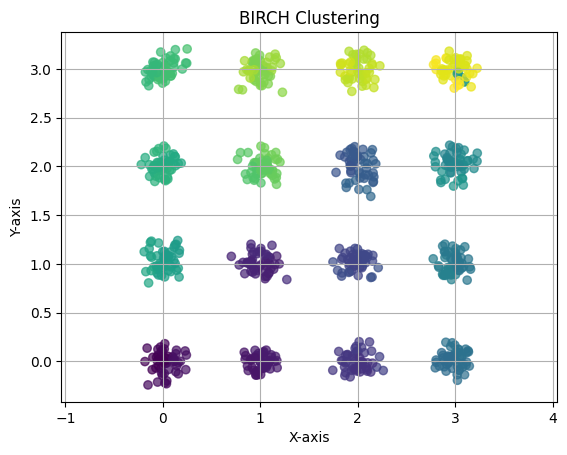

Unique labels: 70


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_quality(data, labels):
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    return {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Davies-Bouldin Index": davies_bouldin
    }


data, _ = generate_N2_blobs(4, 50)
labels = run_birch_clustering(data, threshold=0.1)
metrics = evaluate_clustering_quality(np.array(data), labels)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")
plot_birch_clusters(np.array(data), labels)
print("Unique labels:", len(np.unique(labels)))


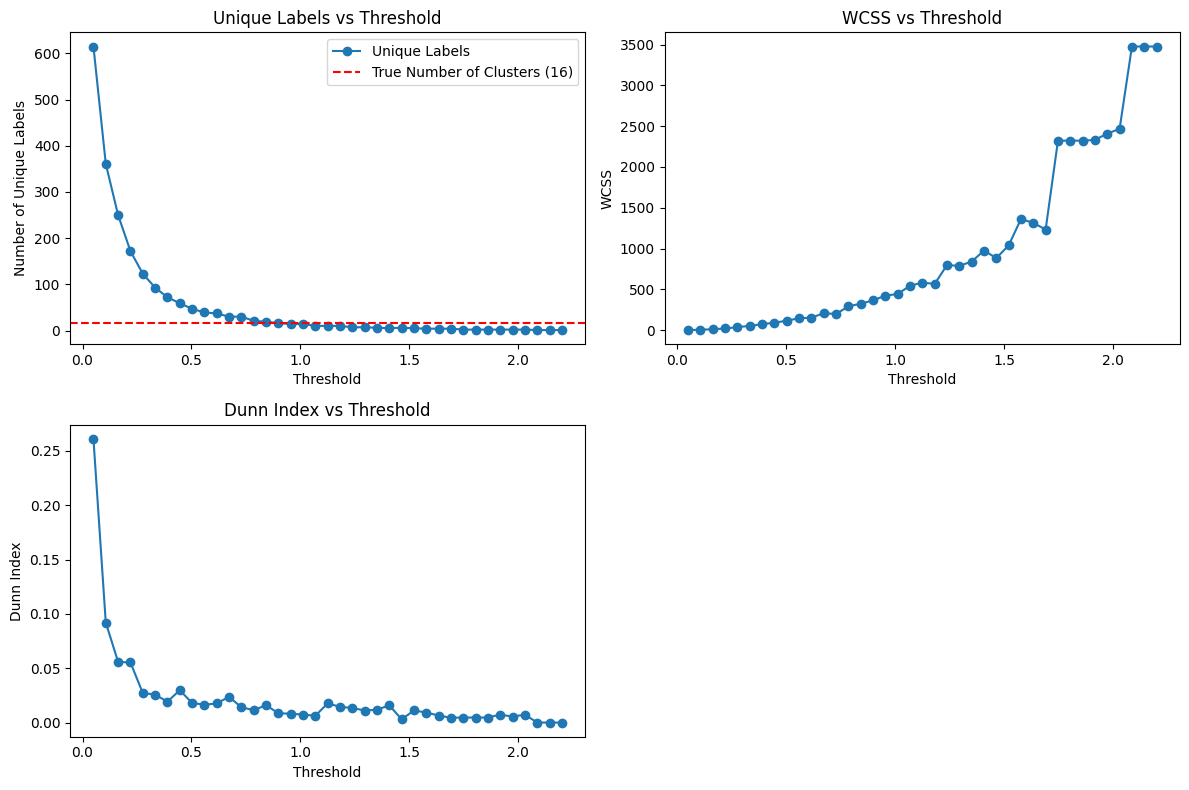

In [ ]:
def calculate_dunn_index(data, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return 0  # Dunn Index is undefined for fewer than 2 clusters

    intercluster_distances = []
    intracluster_diameters = []

    for i in unique_labels:
        cluster_points_i = data[labels == i]
        if len(cluster_points_i) == 0:  # Skip empty clusters
            continue
        for j in unique_labels:
            if i != j:
                cluster_points_j = data[labels == j]
                if len(cluster_points_j) == 0:  # Skip empty clusters
                    continue
                distances = cdist(cluster_points_i, cluster_points_j)
                intercluster_distances.append(np.min(distances))
        intracluster_diameters.append(np.max(cdist(cluster_points_i, cluster_points_i)))

    if len(intercluster_distances) == 0 or len(intracluster_diameters) == 0:
        return 0  # Return 0 if Dunn Index can't be computed

    dunn_index = np.min(intercluster_distances) / np.max(intracluster_diameters)
    return dunn_index

# Use the updated function in the main loop
thresholds = np.linspace(0.05, 2.2, 39)
unique_labels_list = []
wcss_scores = []
dunn_indices = []

N = 4

data = generate_N2_blobs(N, 50)  # Generate dataset

for threshold in thresholds:
    labels = run_birch_clustering(data, threshold=threshold)
    unique_labels_list.append(len(np.unique(labels)))
    wcss_scores.append(calculate_wcss(data, labels))
    dunn_indices.append(calculate_dunn_index(data, labels))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot Unique Labels vs Threshold with horizontal line
plt.subplot(2, 2, 1)
plt.plot(thresholds, unique_labels_list, marker='o', label="Unique Labels")
plt.axhline(y=N*N, color='r', linestyle='--', label="True Number of Clusters (16)")
plt.title("Unique Labels vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Number of Unique Labels")
plt.legend()

# Plot WCSS vs Threshold
plt.subplot(2, 2, 2)
plt.plot(thresholds, wcss_scores, marker='o')
plt.title("WCSS vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("WCSS")

# Plot Dunn Index vs Threshold
plt.subplot(2, 2, 3)
plt.plot(thresholds, dunn_indices, marker='o')
plt.title("Dunn Index vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Dunn Index")

plt.tight_layout()
plt.show()


In [ ]:
# Optimized Gap Statistic
def calculate_gap_statistic_optimized(data, max_clusters=10, n_references=5):
    from sklearn.metrics import pairwise_distances
    import numpy as np

    gaps = []
    for k in range(1, max_clusters + 1):
        # Fit k-means to the original data
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        Wk = np.sum(np.min(pairwise_distances(data, kmeans.cluster_centers_, metric='euclidean'), axis=1))

        # Generate reference data and compute Wk for each
        Wk_ref = []
        for _ in range(n_references):
            random_reference = np.random.uniform(np.min(data, axis=0), np.max(data, axis=0), size=data.shape)
            kmeans.fit(random_reference)
            Wk_ref.append(np.sum(np.min(pairwise_distances(random_reference, kmeans.cluster_centers_, metric='euclidean'), axis=1)))

        # Compute the gap
        Wk_ref_mean = np.mean(Wk_ref)
        gap = np.log(Wk_ref_mean) - np.log(Wk)
        gaps.append(gap)

    return gaps

# Optimized analysis
max_clusters = 10
gap_statistics = calculate_gap_statistic_optimized(data, max_clusters=max_clusters)
silhouette_scores = calculate_silhouette_scores(data, max_clusters=max_clusters)

# Plot Gap Statistic and Silhouette Score
plt.figure(figsize=(12, 6))

# Plot Gap Statistic
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), gap_statistics, marker='o')
plt.title("Gap Statistic")
plt.xlabel("Number of Clusters")
plt.ylabel("Gap Statistic")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


NameError: name 'KMeans' is not defined

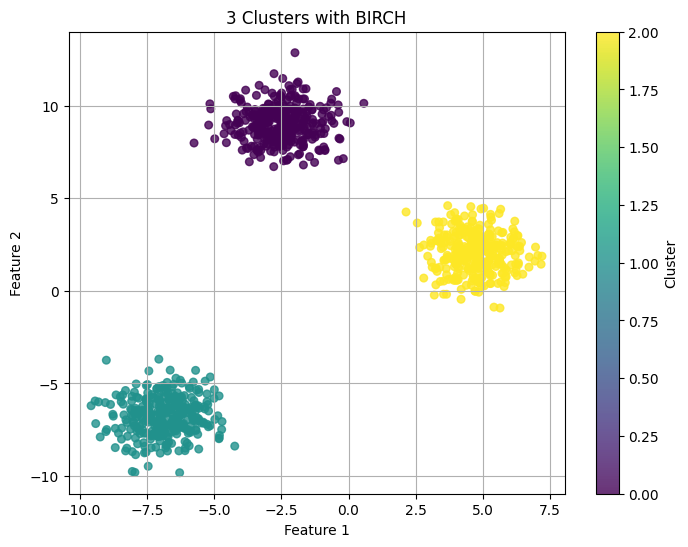

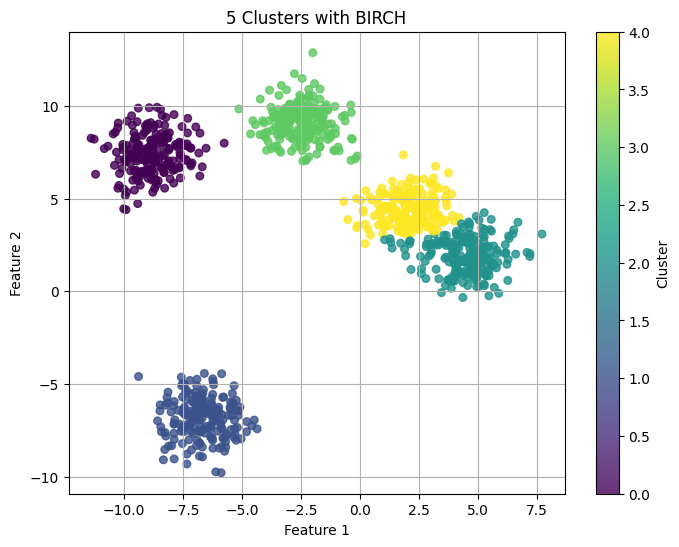

In [ ]:
import matplotlib.pyplot as plt

# Generate data with varying number of clusters
X1, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
X2, _ = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=42)

# Fit BIRCH
birch_3_clusters = Birch(n_clusters=3).fit(X1)
birch_5_clusters = Birch(n_clusters=5).fit(X2)

# Visualization
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

plot_clusters(X1, birch_3_clusters.labels_, "3 Clusters with BIRCH")
plot_clusters(X2, birch_5_clusters.labels_, "5 Clusters with BIRCH")


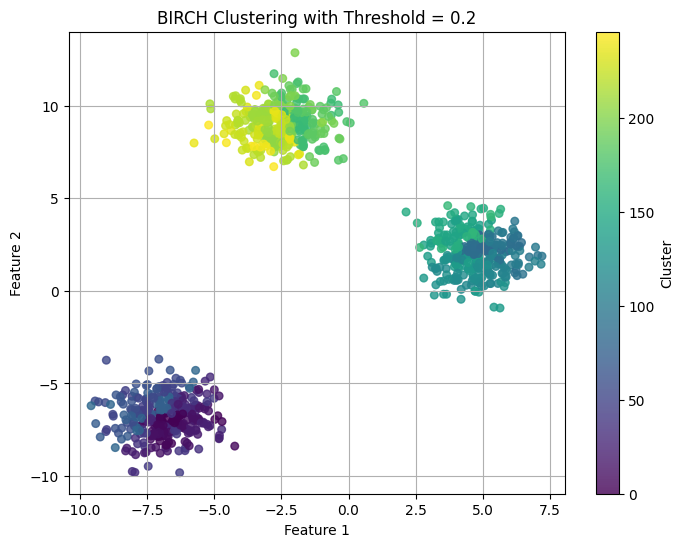

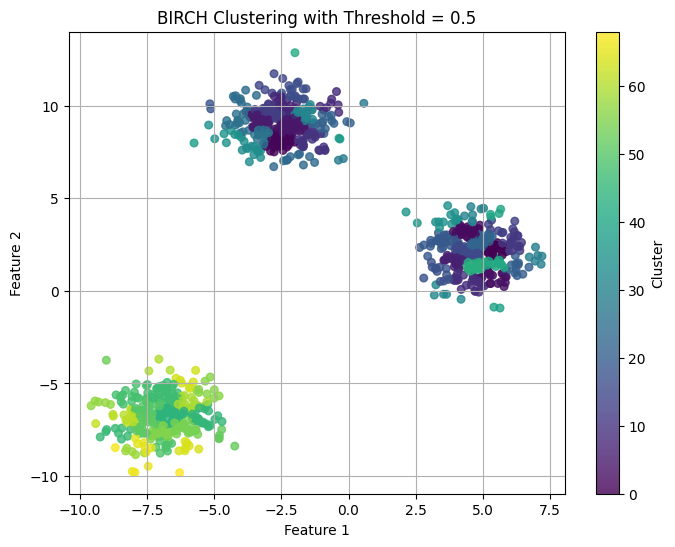

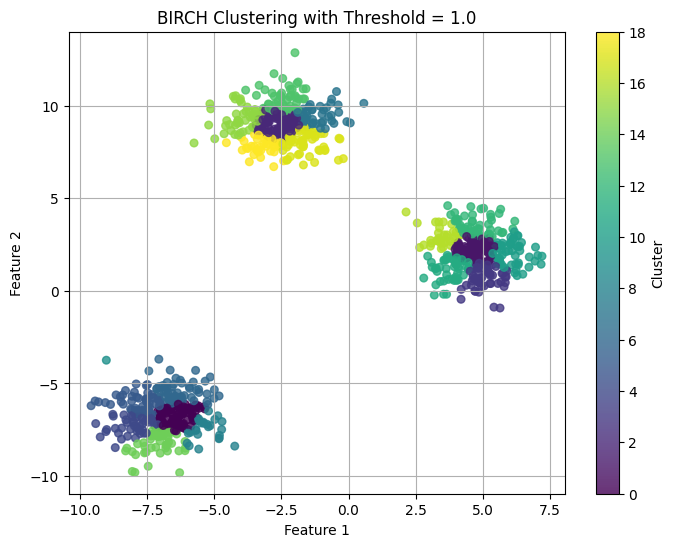

In [ ]:

# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

# Define a function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Experiment with different thresholds
thresholds = [0.2, 0.5, 1.0]
birch_models = [Birch(n_clusters=None, threshold=t).fit(X) for t in thresholds]

# Visualization of results
for t, model in zip(thresholds, birch_models):
    plot_clusters(X, model.labels_, f"BIRCH Clustering with Threshold = {t}")


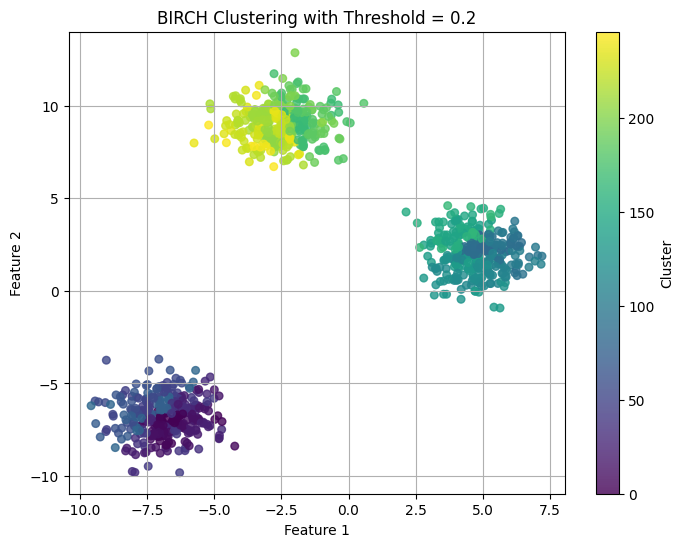

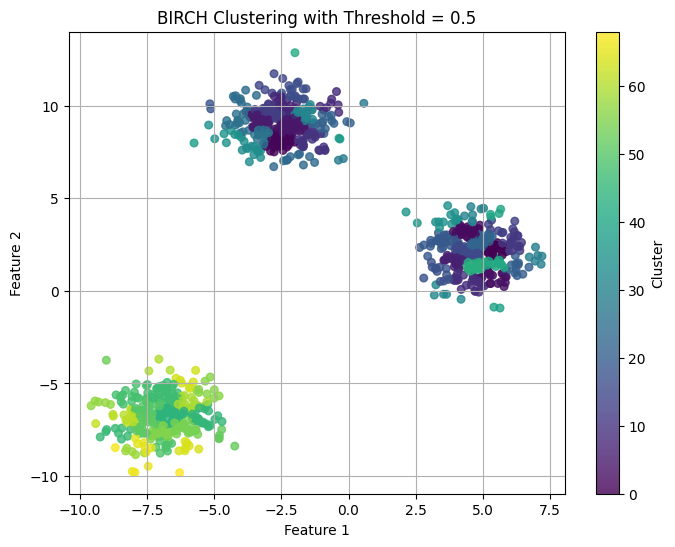

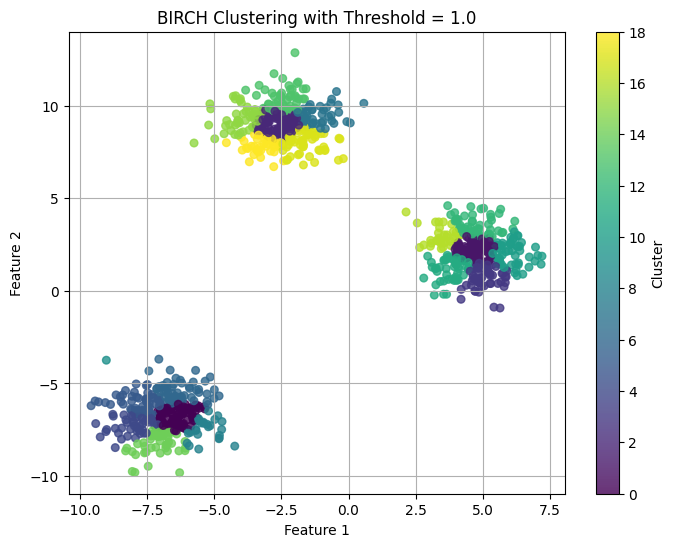

In [ ]:
# Fit BIRCH with different thresholds
thresholds = [0.2, 0.5, 1.0]
birch_models = [Birch(n_clusters=None, threshold=t).fit(X) for t in thresholds]

# Visualization
for t, model in zip(thresholds, birch_models):
    plot_clusters(X, model.labels_, f"BIRCH Clustering with Threshold = {t}")


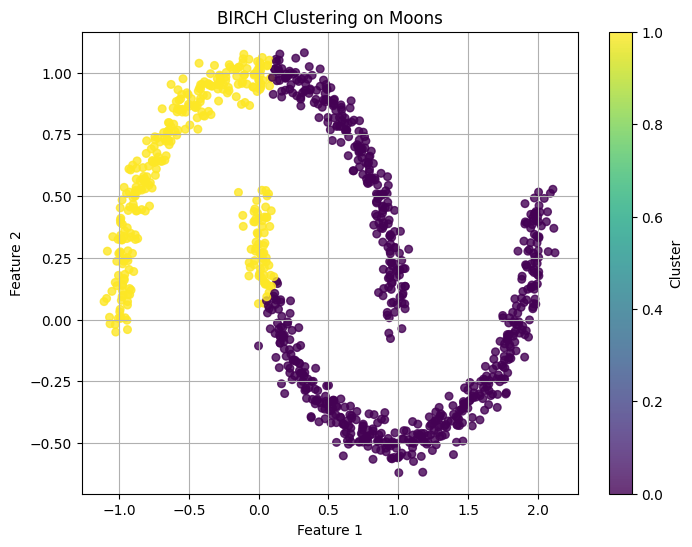

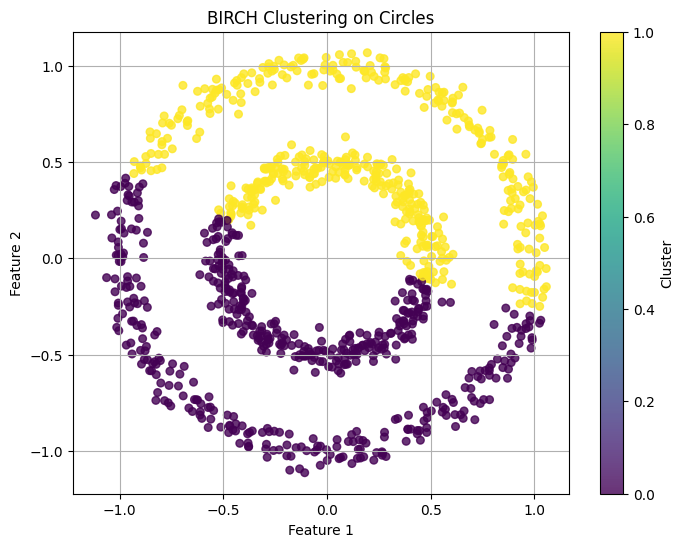

In [ ]:
from sklearn.datasets import make_moons, make_circles

# Generate non-spherical data
X_moons, _ = make_moons(n_samples=1000, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# Fit BIRCH
birch_moons = Birch(n_clusters=2).fit(X_moons)
birch_circles = Birch(n_clusters=2).fit(X_circles)

# Visualization
plot_clusters(X_moons, birch_moons.labels_, "BIRCH Clustering on Moons")
plot_clusters(X_circles, birch_circles.labels_, "BIRCH Clustering on Circles")


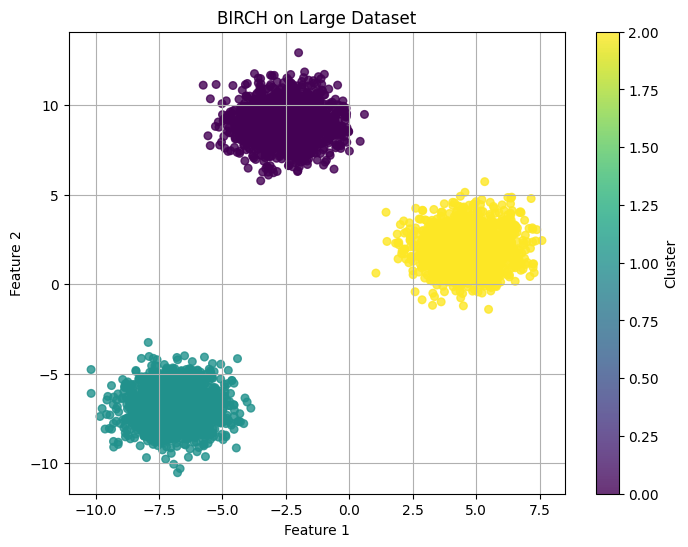

In [ ]:
# Generate a very large dataset
X_large, _ = make_blobs(n_samples=100000, centers=3, n_features=2, random_state=42)

# Fit BIRCH
birch_large = Birch(n_clusters=3).fit(X_large)

# Visualization (only sample points for visualization)
sample_idx = np.random.choice(X_large.shape[0], size=5000, replace=False)
plot_clusters(X_large[sample_idx], birch_large.labels_[sample_idx], "BIRCH on Large Dataset")


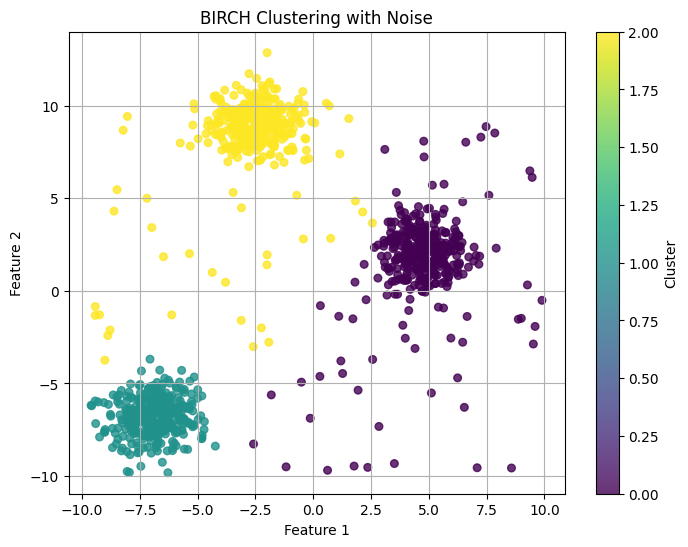

In [ ]:
# Generate data with added noise
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
X_noise = np.concatenate([X, np.random.uniform(-10, 10, size=(100, 2))])  # Add 100 noisy points

# Fit BIRCH
birch_noise = Birch(n_clusters=3).fit(X_noise)

# Visualization
plot_clusters(X_noise, birch_noise.labels_, "BIRCH Clustering with Noise")


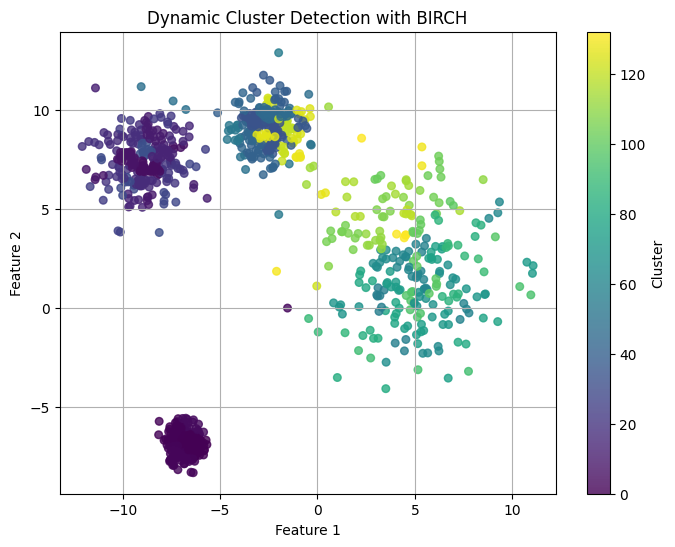

In [ ]:
# Generate data with varying cluster patterns
X_varied, _ = make_blobs(n_samples=1000, centers=4, cluster_std=[1.0, 2.5, 0.5, 1.2], random_state=42)

# Fit BIRCH
birch_dynamic = Birch(n_clusters=None).fit(X_varied)

# Visualization
plot_clusters(X_varied, birch_dynamic.labels_, "Dynamic Cluster Detection with BIRCH")


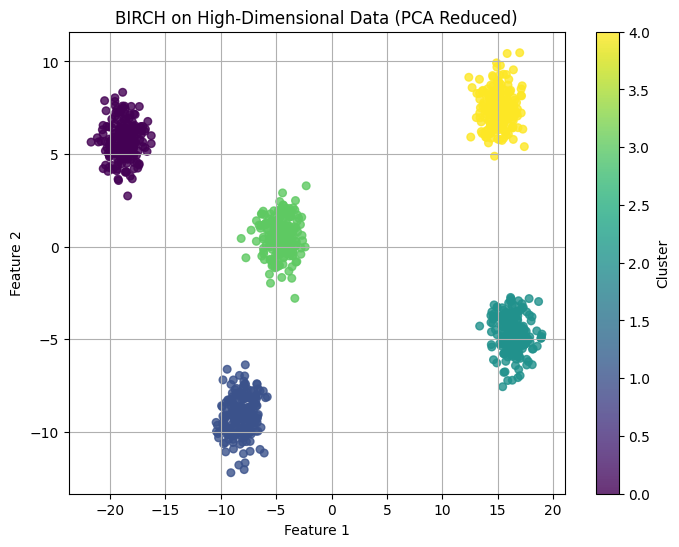

In [ ]:
from sklearn.decomposition import PCA

# Generate high-dimensional data
X_high_dim, _ = make_blobs(n_samples=1000, centers=5, n_features=10, random_state=42)

# Fit BIRCH
birch_high_dim = Birch(n_clusters=5).fit(X_high_dim)

# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_high_dim)

# Visualization
plot_clusters(X_pca, birch_high_dim.labels_, "BIRCH on High-Dimensional Data (PCA Reduced)")


Experiment 1: Varying the Number of Clusters
Number of Clusters: 3
  Silhouette Score: 0.844, Calinski-Harabasz: 16512.261, Davies-Bouldin: 0.220


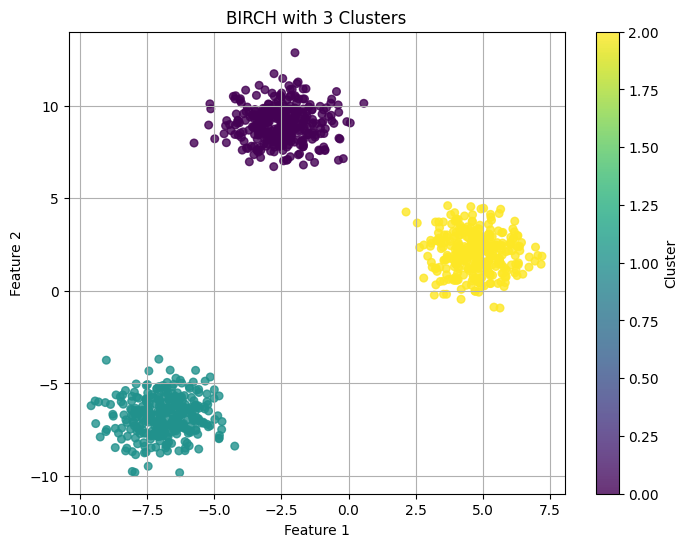

Number of Clusters: 5
  Silhouette Score: 0.668, Calinski-Harabasz: 7294.449, Davies-Bouldin: 0.466


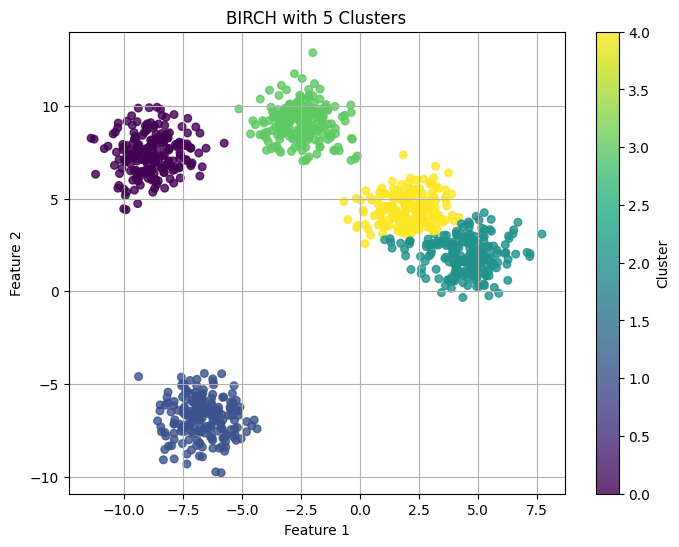


Experiment 2: Effect of Threshold on Clustering
Threshold: 0.2
  Silhouette Score: 0.346, Calinski-Harabasz: 10329.925, Davies-Bouldin: 0.599


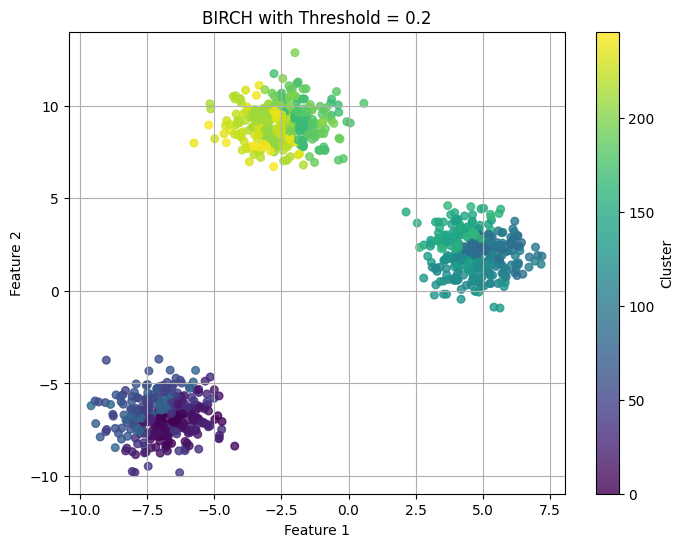

Threshold: 0.5
  Silhouette Score: 0.323, Calinski-Harabasz: 6635.684, Davies-Bouldin: 0.724


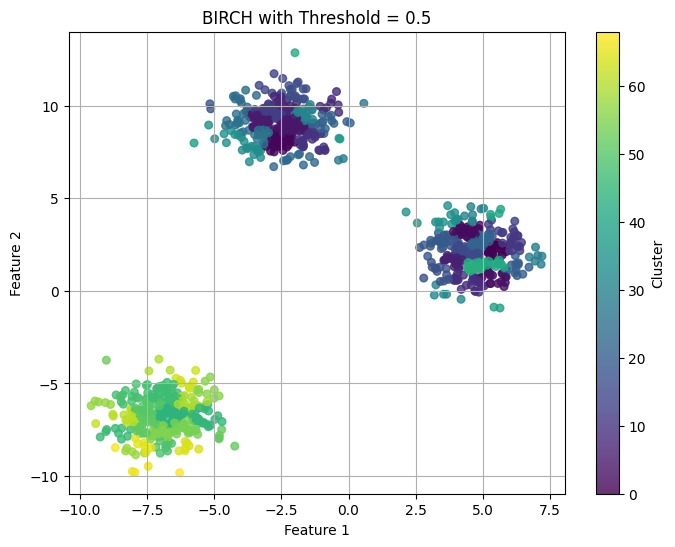

Threshold: 1.0
  Silhouette Score: 0.307, Calinski-Harabasz: 7420.481, Davies-Bouldin: 0.887


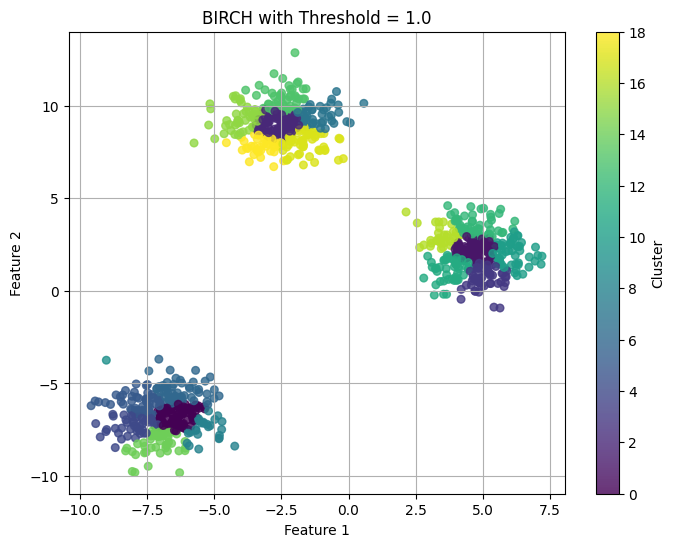


Experiment 3: Non-Spherical Clusters
Moons Dataset
  Silhouette Score: 0.437, Calinski-Harabasz: 1093.553, Davies-Bouldin: 0.778


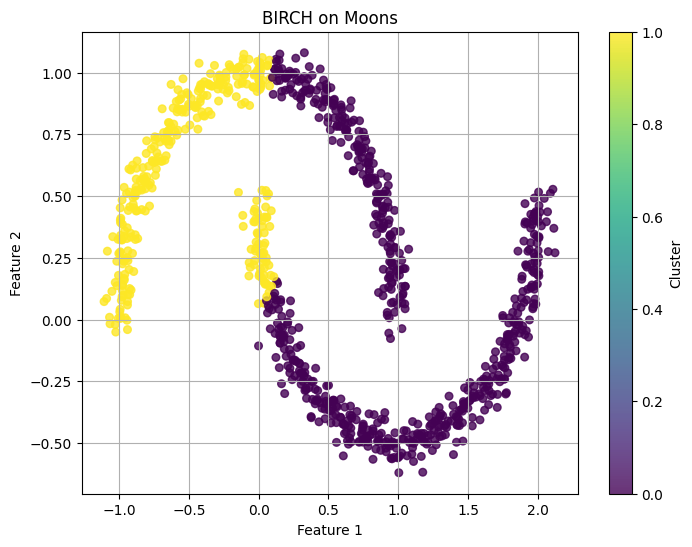

Circles Dataset
  Silhouette Score: 0.351, Calinski-Harabasz: 567.625, Davies-Bouldin: 1.190


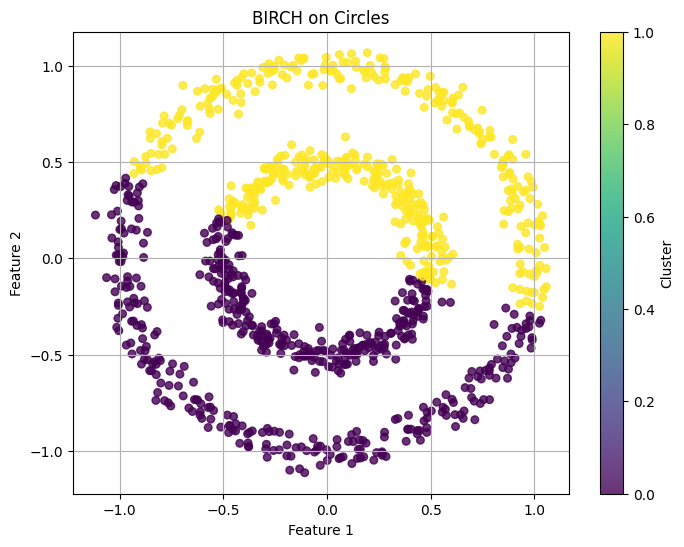


Experiment 4: Handling Large Datasets


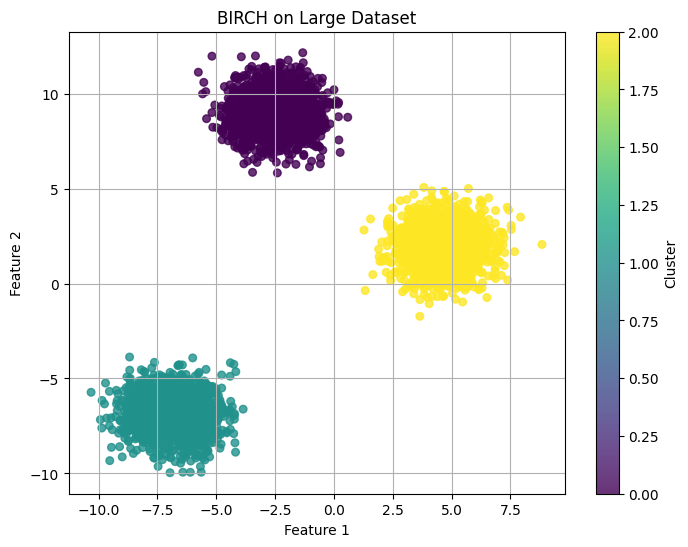


Experiment 5: Noise and Outlier Sensitivity
Noise Dataset
  Silhouette Score: 0.776, Calinski-Harabasz: 6107.193, Davies-Bouldin: 0.296


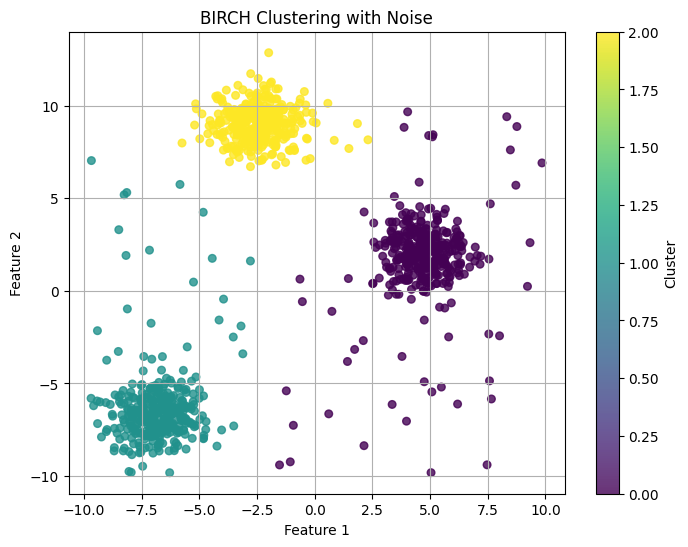


Experiment 6: Dynamic Number of Clusters
Dynamic Clustering
  Silhouette Score: 0.312, Calinski-Harabasz: 3178.143, Davies-Bouldin: 0.645


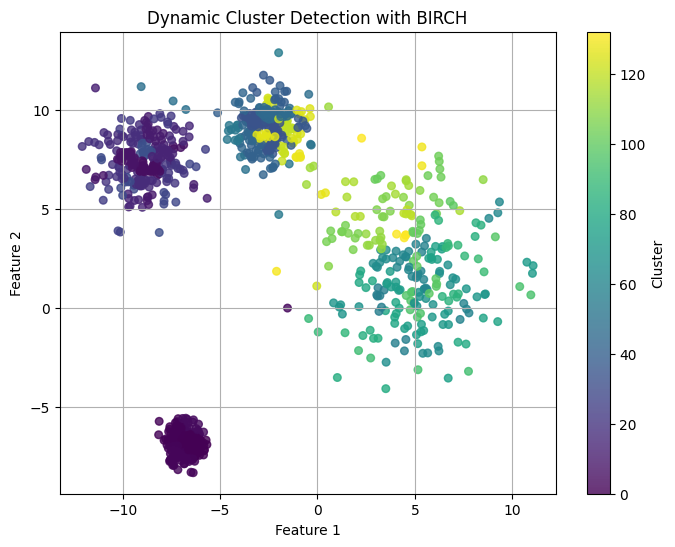


Experiment 7: Clustering High-Dimensional Data
High-Dimensional Data
  Silhouette Score: 0.760, Calinski-Harabasz: 6849.399, Davies-Bouldin: 0.346


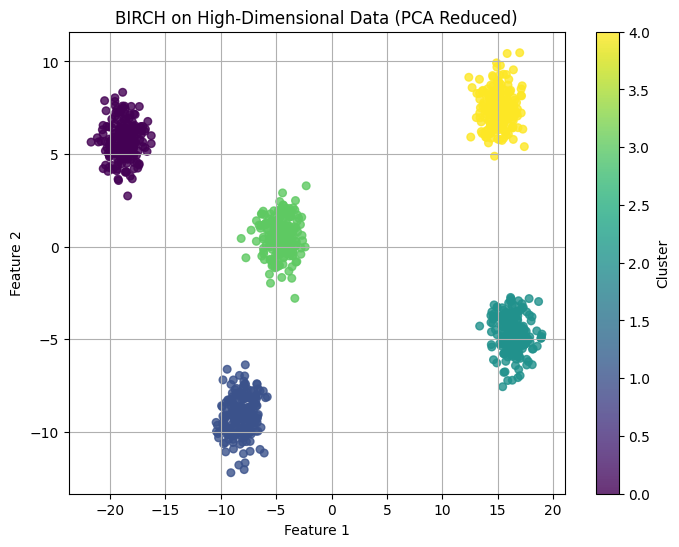

In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Define a function to compute and print clustering metrics
def compute_metrics(X, labels):
    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette, calinski_harabasz, davies_bouldin

# 1. Varying the Number of Clusters
print("Experiment 1: Varying the Number of Clusters")
for n_clusters in [3, 5]:
    X, _ = make_blobs(n_samples=1000, centers=n_clusters, n_features=2, random_state=42)
    birch = Birch(n_clusters=n_clusters).fit(X)
    silhouette, calinski_harabasz, davies_bouldin = compute_metrics(X, birch.labels_)
    print(f"Number of Clusters: {n_clusters}")
    print(f"  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
    plot_clusters(X, birch.labels_, f"BIRCH with {n_clusters} Clusters")

# 2. Effect of Threshold on Clustering
print("\nExperiment 2: Effect of Threshold on Clustering")
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
thresholds = [0.2, 0.5, 1.0]
for t in thresholds:
    birch = Birch(n_clusters=None, threshold=t).fit(X)
    silhouette, calinski_harabasz, davies_bouldin = compute_metrics(X, birch.labels_)
    print(f"Threshold: {t}")
    print(f"  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
    plot_clusters(X, birch.labels_, f"BIRCH with Threshold = {t}")

# 3. Non-Spherical Clusters
print("\nExperiment 3: Non-Spherical Clusters")
datasets = {
    "Moons": make_moons(n_samples=1000, noise=0.05, random_state=42),
    "Circles": make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
}
for name, (X, _) in datasets.items():
    birch = Birch(n_clusters=2).fit(X)
    silhouette, calinski_harabasz, davies_bouldin = compute_metrics(X, birch.labels_)
    print(f"{name} Dataset")
    print(f"  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
    plot_clusters(X, birch.labels_, f"BIRCH on {name}")

# 4. Handling Large Datasets
print("\nExperiment 4: Handling Large Datasets")
X, _ = make_blobs(n_samples=100000, centers=3, n_features=2, random_state=42)
birch = Birch(n_clusters=3).fit(X)
sample_idx = np.random.choice(X.shape[0], size=5000, replace=False)
plot_clusters(X[sample_idx], birch.labels_[sample_idx], "BIRCH on Large Dataset")

# 5. Noise and Outlier Sensitivity
print("\nExperiment 5: Noise and Outlier Sensitivity")
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
X_noise = np.concatenate([X, np.random.uniform(-10, 10, size=(100, 2))])  # Add 100 noisy points
birch = Birch(n_clusters=3).fit(X_noise)
silhouette, calinski_harabasz, davies_bouldin = compute_metrics(X_noise, birch.labels_)
print(f"Noise Dataset\n  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
plot_clusters(X_noise, birch.labels_, "BIRCH Clustering with Noise")

# 6. Dynamic Number of Clusters (n_clusters=None)
print("\nExperiment 6: Dynamic Number of Clusters")
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=[1.0, 2.5, 0.5, 1.2], random_state=42)
birch = Birch(n_clusters=None).fit(X)
silhouette, calinski_harabasz, davies_bouldin = compute_metrics(X, birch.labels_)
print(f"Dynamic Clustering\n  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
plot_clusters(X, birch.labels_, "Dynamic Cluster Detection with BIRCH")

# 7. Clustering High-Dimensional Data
print("\nExperiment 7: Clustering High-Dimensional Data")
X, _ = make_blobs(n_samples=1000, centers=5, n_features=10, random_state=42)
birch = Birch(n_clusters=5).fit(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
silhouette, calinski_harabasz, davies_bouldin = compute_metrics(X, birch.labels_)
print(f"High-Dimensional Data\n  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
plot_clusters(X_pca, birch.labels_, "BIRCH on High-Dimensional Data (PCA Reduced)")


Experiment 1: Varying the Number of Clusters
Number of Clusters: 3
  Silhouette Score: 0.844, Calinski-Harabasz: 16512.261, Davies-Bouldin: 0.220
  Adjusted Rand Index: 1.000, Normalized Mutual Information: 1.000


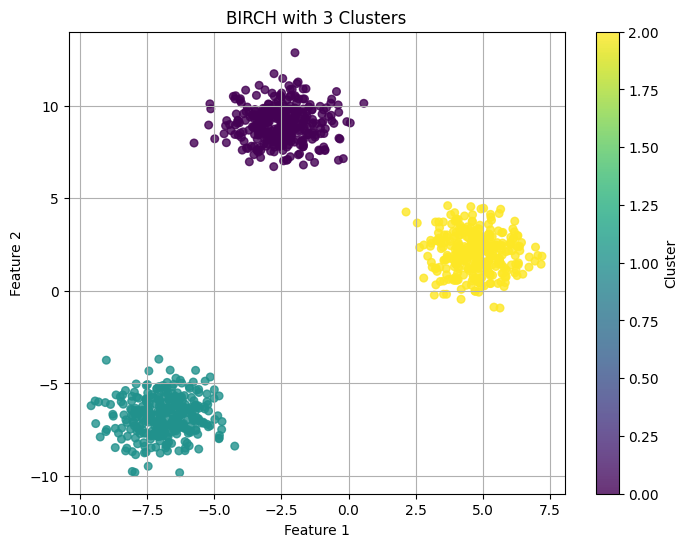

Number of Clusters: 5
  Silhouette Score: 0.668, Calinski-Harabasz: 7294.449, Davies-Bouldin: 0.466
  Adjusted Rand Index: 0.932, Normalized Mutual Information: 0.931


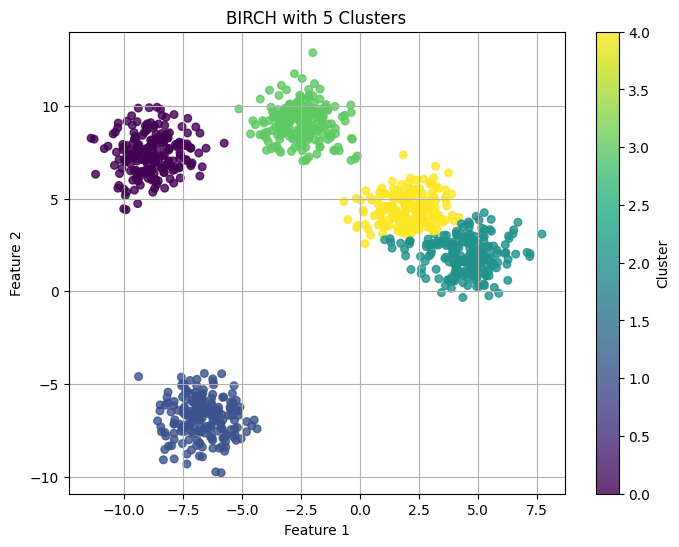


Experiment 2: Effect of Threshold on Clustering
Threshold: 0.2
  Silhouette Score: 0.346, Calinski-Harabasz: 10329.925, Davies-Bouldin: 0.599
  Adjusted Rand Index: 0.020, Normalized Mutual Information: 0.344


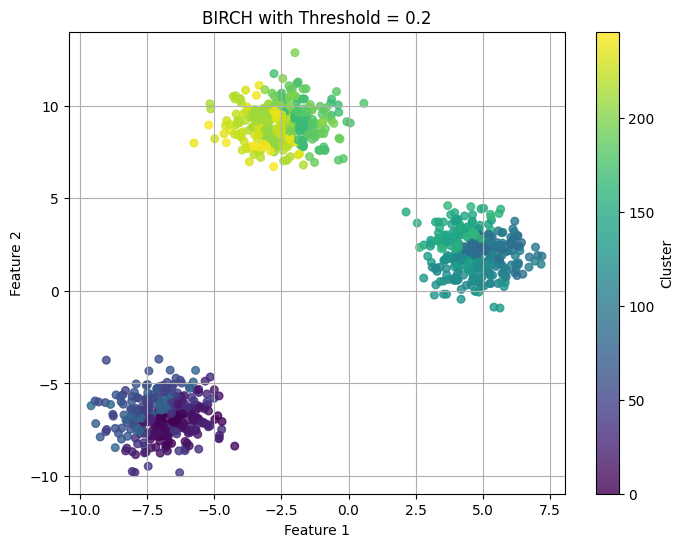

Threshold: 0.5
  Silhouette Score: 0.323, Calinski-Harabasz: 6635.684, Davies-Bouldin: 0.724
  Adjusted Rand Index: 0.089, Normalized Mutual Information: 0.439


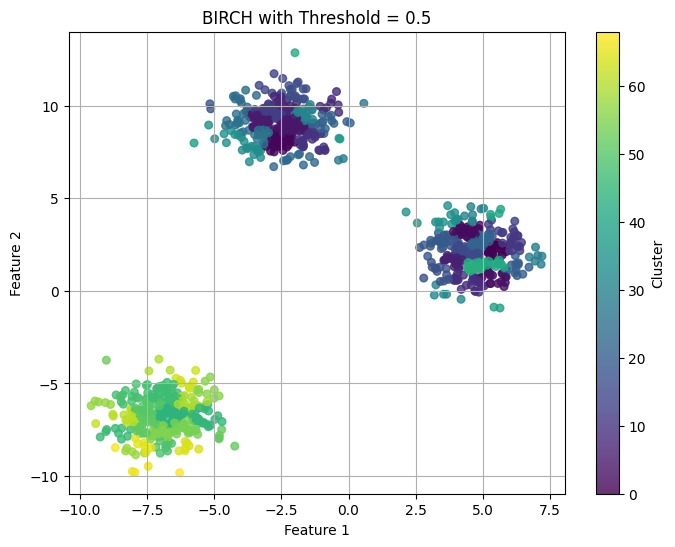

Threshold: 1.0
  Silhouette Score: 0.307, Calinski-Harabasz: 7420.481, Davies-Bouldin: 0.887
  Adjusted Rand Index: 0.229, Normalized Mutual Information: 0.557


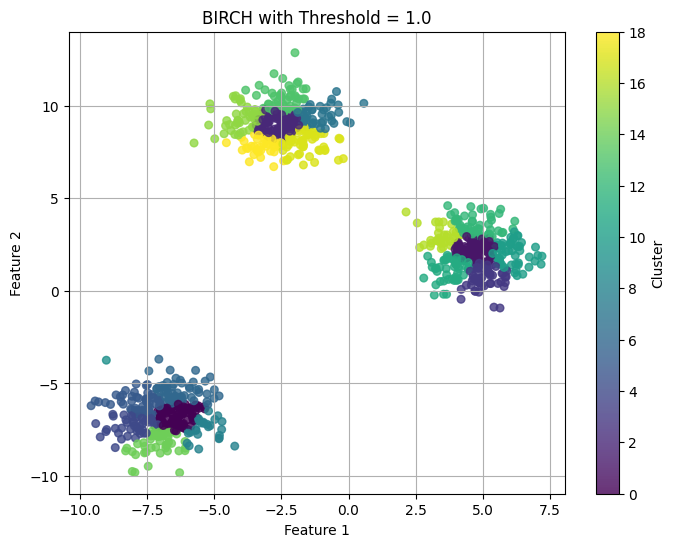


Experiment 3: Non-Spherical Clusters
Moons Dataset
  Silhouette Score: 0.437, Calinski-Harabasz: 1093.553, Davies-Bouldin: 0.778
  Adjusted Rand Index: 0.156, Normalized Mutual Information: 0.141


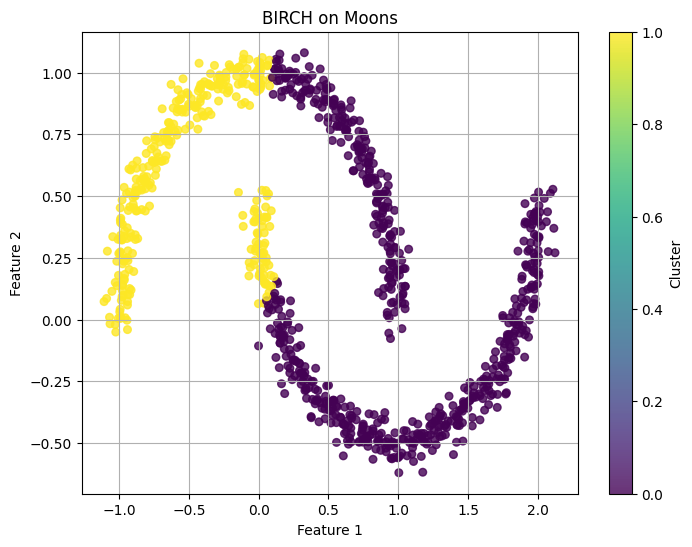

Circles Dataset
  Silhouette Score: 0.351, Calinski-Harabasz: 567.625, Davies-Bouldin: 1.190
  Adjusted Rand Index: -0.001, Normalized Mutual Information: 0.000


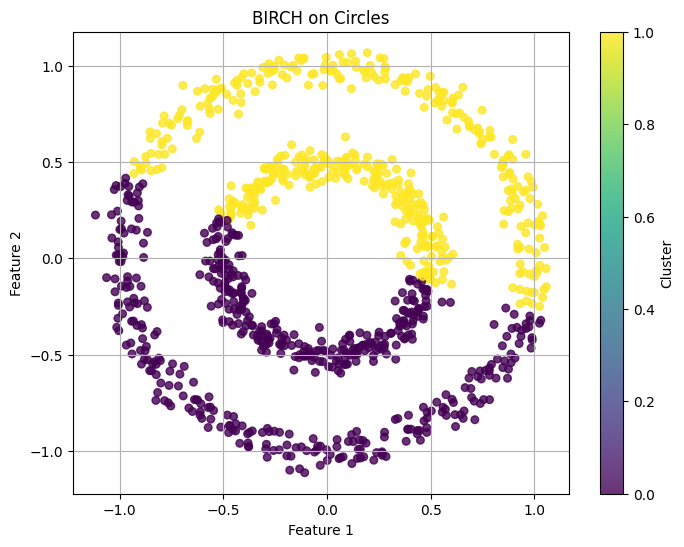


Experiment 4: Handling Large Datasets


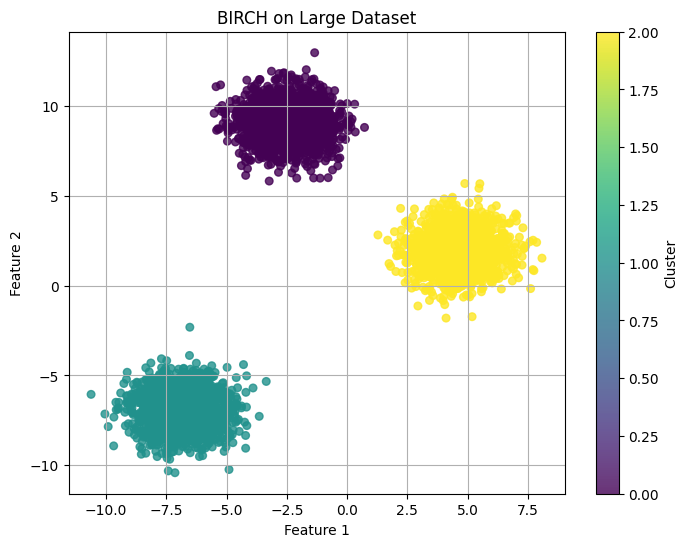


Experiment 5: Noise and Outlier Sensitivity
Noise Dataset
  Silhouette Score: 0.754, Calinski-Harabasz: 5371.717, Davies-Bouldin: 0.334


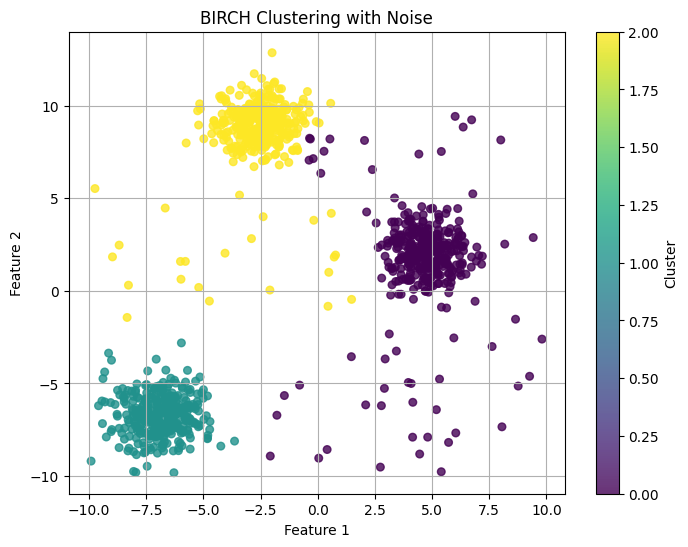


Experiment 6: Dynamic Number of Clusters
Dynamic Clustering
  Silhouette Score: 0.312, Calinski-Harabasz: 3178.143, Davies-Bouldin: 0.645
  Adjusted Rand Index: 0.157, Normalized Mutual Information: 0.495


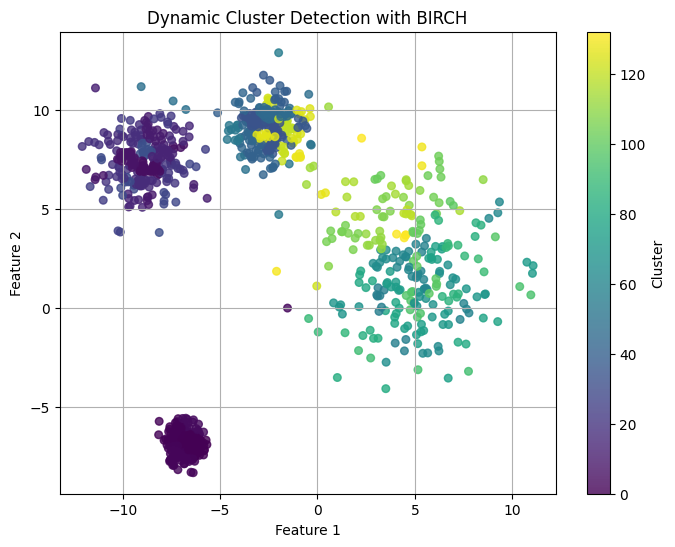


Experiment 7: Clustering High-Dimensional Data
High-Dimensional Data
  Silhouette Score: 0.760, Calinski-Harabasz: 6849.399, Davies-Bouldin: 0.346
  Adjusted Rand Index: 1.000, Normalized Mutual Information: 1.000


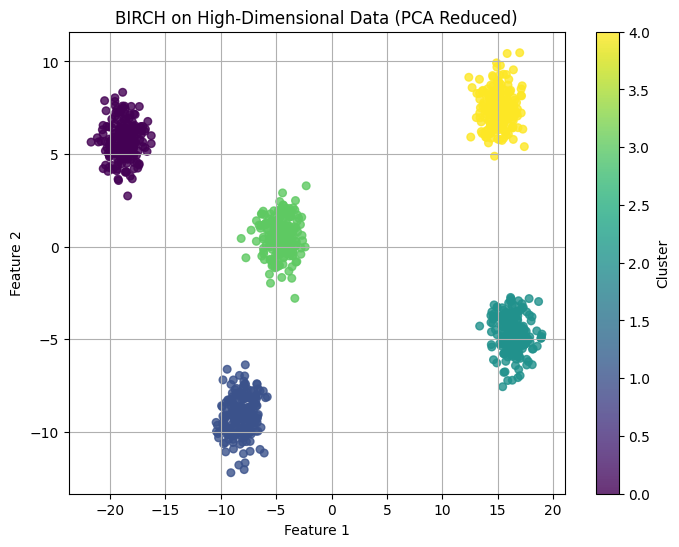

In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Define a function to compute and print clustering metrics
def compute_metrics(X, labels, true_labels=None):
    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)

    # Calculate correctness metrics only if true labels are available
    if true_labels is not None:
        ari = adjusted_rand_score(true_labels, labels)
        nmi = normalized_mutual_info_score(true_labels, labels)
    else:
        ari, nmi = None, None

    return silhouette, calinski_harabasz, davies_bouldin, ari, nmi

# 1. Varying the Number of Clusters
print("Experiment 1: Varying the Number of Clusters")
for n_clusters in [3, 5]:
    X, true_labels = make_blobs(n_samples=1000, centers=n_clusters, n_features=2, random_state=42)
    birch = Birch(n_clusters=n_clusters).fit(X)
    silhouette, calinski_harabasz, davies_bouldin, ari, nmi = compute_metrics(X, birch.labels_, true_labels)
    print(f"Number of Clusters: {n_clusters}")
    print(f"  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
    print(f"  Adjusted Rand Index: {ari:.3f}, Normalized Mutual Information: {nmi:.3f}")
    plot_clusters(X, birch.labels_, f"BIRCH with {n_clusters} Clusters")

# 2. Effect of Threshold on Clustering
print("\nExperiment 2: Effect of Threshold on Clustering")
X, true_labels = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
thresholds = [0.2, 0.5, 1.0]
for t in thresholds:
    birch = Birch(n_clusters=None, threshold=t).fit(X)
    silhouette, calinski_harabasz, davies_bouldin, ari, nmi = compute_metrics(X, birch.labels_, true_labels)
    print(f"Threshold: {t}")
    print(f"  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
    print(f"  Adjusted Rand Index: {ari:.3f}, Normalized Mutual Information: {nmi:.3f}")
    plot_clusters(X, birch.labels_, f"BIRCH with Threshold = {t}")

# 3. Non-Spherical Clusters
print("\nExperiment 3: Non-Spherical Clusters")
datasets = {
    "Moons": make_moons(n_samples=1000, noise=0.05, random_state=42),
    "Circles": make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
}
for name, (X, true_labels) in datasets.items():
    birch = Birch(n_clusters=2).fit(X)
    silhouette, calinski_harabasz, davies_bouldin, ari, nmi = compute_metrics(X, birch.labels_, true_labels)
    print(f"{name} Dataset")
    print(f"  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
    print(f"  Adjusted Rand Index: {ari:.3f}, Normalized Mutual Information: {nmi:.3f}")
    plot_clusters(X, birch.labels_, f"BIRCH on {name}")

# 4. Handling Large Datasets
print("\nExperiment 4: Handling Large Datasets")
X, true_labels = make_blobs(n_samples=100000, centers=3, n_features=2, random_state=42)
birch = Birch(n_clusters=3).fit(X)
sample_idx = np.random.choice(X.shape[0], size=5000, replace=False)
plot_clusters(X[sample_idx], birch.labels_[sample_idx], "BIRCH on Large Dataset")

# 5. Noise and Outlier Sensitivity
print("\nExperiment 5: Noise and Outlier Sensitivity")
X, true_labels = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
X_noise = np.concatenate([X, np.random.uniform(-10, 10, size=(100, 2))])  # Add 100 noisy points
birch = Birch(n_clusters=3).fit(X_noise)
silhouette, calinski_harabasz, davies_bouldin, ari, nmi = compute_metrics(X_noise, birch.labels_, np.concatenate([true_labels, [-1] * 100]))
print(f"Noise Dataset\n  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
plot_clusters(X_noise, birch.labels_, "BIRCH Clustering with Noise")

# 6. Dynamic Number of Clusters (n_clusters=None)
print("\nExperiment 6: Dynamic Number of Clusters")
X, true_labels = make_blobs(n_samples=1000, centers=4, cluster_std=[1.0, 2.5, 0.5, 1.2], random_state=42)
birch = Birch(n_clusters=None).fit(X)
silhouette, calinski_harabasz, davies_bouldin, ari, nmi = compute_metrics(X, birch.labels_, true_labels)
print(f"Dynamic Clustering\n  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
print(f"  Adjusted Rand Index: {ari:.3f}, Normalized Mutual Information: {nmi:.3f}")
plot_clusters(X, birch.labels_, "Dynamic Cluster Detection with BIRCH")

# 7. Clustering High-Dimensional Data
print("\nExperiment 7: Clustering High-Dimensional Data")
X, true_labels = make_blobs(n_samples=1000, centers=5, n_features=10, random_state=42)
birch = Birch(n_clusters=5).fit(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
silhouette, calinski_harabasz, davies_bouldin, ari, nmi = compute_metrics(X, birch.labels_, true_labels)
print(f"High-Dimensional Data\n  Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {calinski_harabasz:.3f}, Davies-Bouldin: {davies_bouldin:.3f}")
print(f"  Adjusted Rand Index: {ari:.3f}, Normalized Mutual Information: {nmi:.3f}")
plot_clusters(X_pca, birch.labels_, "BIRCH on High-Dimensional Data (PCA Reduced)")


R_max: 3.86, D_min: 3.55
Optimal Threshold (A-BIRCH): 3.80
Default Threshold: Silhouette Score = 0.68, ARI = 0.95
Optimal Threshold: Silhouette Score = 0.70, ARI = 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (3) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(


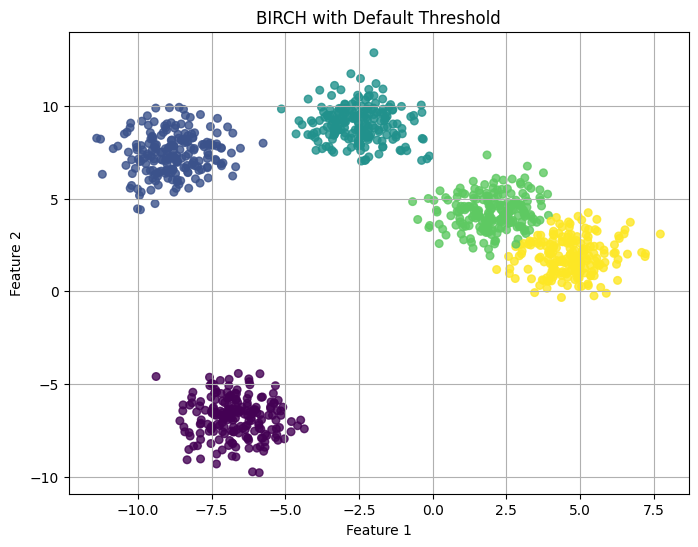

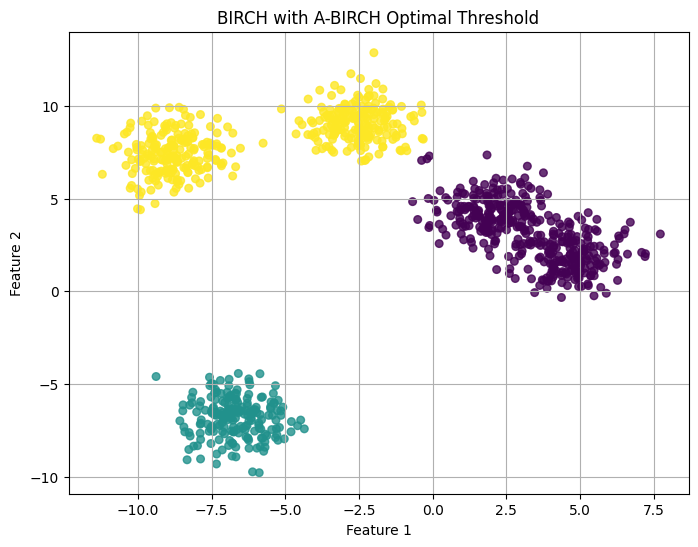

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, true_labels = make_blobs(n_samples=1000, centers=5, cluster_std=1.0, random_state=42)

# Step 2: Compute R_max and D_min
def compute_cluster_properties(X, labels):
    cluster_centers = []
    cluster_radii = []
    unique_labels = np.unique(labels)

    for label in unique_labels:
        cluster_points = X[labels == label]
        center = np.mean(cluster_points, axis=0)
        radius = np.max(np.linalg.norm(cluster_points - center, axis=1))
        cluster_centers.append(center)
        cluster_radii.append(radius)

    R_max = max(cluster_radii)
    D_min = np.min([
        np.linalg.norm(np.array(c1) - np.array(c2))
        for i, c1 in enumerate(cluster_centers)
        for j, c2 in enumerate(cluster_centers)
        if i < j
    ])

    return R_max, D_min

# Initial clustering with KMeans to calculate R_max and D_min
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
R_max, D_min = compute_cluster_properties(X, kmeans.labels_)
print(f"R_max: {R_max:.2f}, D_min: {D_min:.2f}")

# Step 3: Compute optimal threshold using A-BIRCH formula
optimal_threshold = 0.2 * D_min + 0.8 * R_max
print(f"Optimal Threshold (A-BIRCH): {optimal_threshold:.2f}")

# Step 4: Apply BIRCH with default and optimal thresholds
# Default threshold
birch_default = Birch(threshold=1.5, n_clusters=5).fit(X)
default_labels = birch_default.labels_

# Optimal threshold
birch_optimal = Birch(threshold=optimal_threshold, n_clusters=5).fit(X)
optimal_labels = birch_optimal.labels_

# Step 5: Evaluate Clustering
def evaluate_clustering(X, true_labels, predicted_labels):
    silhouette = silhouette_score(X, predicted_labels)
    ari = adjusted_rand_score(true_labels, predicted_labels)
    return silhouette, ari

default_silhouette, default_ari = evaluate_clustering(X, true_labels, default_labels)
optimal_silhouette, optimal_ari = evaluate_clustering(X, true_labels, optimal_labels)

print(f"Default Threshold: Silhouette Score = {default_silhouette:.2f}, ARI = {default_ari:.2f}")
print(f"Optimal Threshold: Silhouette Score = {optimal_silhouette:.2f}, ARI = {optimal_ari:.2f}")

# Step 6: Visualize Results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

plot_clusters(X, default_labels, "BIRCH with Default Threshold")
plot_clusters(X, optimal_labels, "BIRCH with A-BIRCH Optimal Threshold")


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import time

# Step 1: Generate Large Synthetic Dataset
X, _ = make_blobs(n_samples=1_000_000, centers=5, n_features=2, random_state=42)
sample_idx = np.random.choice(X.shape[0], size=10_000, replace=False)  # For visualization

# Helper function for clustering a chunk of data
def birch_chunk(data):
    birch = Birch(n_clusters=None)
    birch.fit(data)
    return birch.subcluster_centers_, birch.subcluster_labels_

# Step 2: Parallel Clustering using Multiprocessing
def parallel_birch(X, n_clusters, n_processes=4):
    chunk_size = X.shape[0] // n_processes
    chunks = [X[i:i + chunk_size] for i in range(0, X.shape[0], chunk_size)]

    with Pool(n_processes) as pool:
        results = pool.map(birch_chunk, chunks)

    # Aggregate results from all chunks
    centers = np.vstack([result[0] for result in results])
    labels = np.hstack([result[1] for result in results])

    # Final clustering on aggregated subcluster centers
    final_birch = Birch(n_clusters=n_clusters)
    final_birch.fit(centers)
    final_labels = final_birch.labels_[np.argsort(np.hstack([result[1] for result in results]))]

    return final_labels

# Single-threaded BIRCH
start_time = time.time()
birch_single = Birch(n_clusters=5).fit(X)
single_runtime = time.time() - start_time
print(f"Single-Threaded BIRCH Runtime: {single_runtime:.2f} seconds")

# Parallelized BIRCH
start_time = time.time()
parallel_labels = parallel_birch(X, n_clusters=5, n_processes=4)
parallel_runtime = time.time() - start_time
print(f"Parallelized BIRCH Runtime: {parallel_runtime:.2f} seconds")

# Step 3: Evaluation
single_labels = birch_single.labels_
single_silhouette = silhouette_score(X, single_labels)
parallel_silhouette = silhouette_score(X, parallel_labels)

print(f"Single-Threaded Silhouette Score: {single_silhouette:.3f}")
print(f"Parallelized Silhouette Score: {parallel_silhouette:.3f}")

# Step 4: Visualization
def plot_clusters(X, labels, title, idx=None):
    plt.figure(figsize=(8, 6))
    if idx is not None:
        X = X[idx]
        labels = labels[idx]
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.5)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_clusters(X, single_labels, "Single-Threaded BIRCH", sample_idx)
plot_clusters(X, parallel_labels, "Parallelized BIRCH", sample_idx)


Single-Threaded BIRCH Runtime: 35.80 seconds
Parallelized BIRCH Runtime: 35.73 seconds
